# CAPSTONE - MSBA - FALL 2024
# GROUP 7- EDA NOTEBOOK

 <h2>
<ol>
1. <a href="#1.Introduction">Introduction</a>
    <ul>   
        <li><a href="#i.-Business-Problem">Business Problem</a></li>
        <li><a href="#ii.-Analytics-Approach">Analytics Approach</a></li>
        <li><a href="#iii.-Scope-of-the-Project">Scope</a></li>
        <li><a href="#iv.-Purpose-of-the-Notebook">Purpose of the Notebook</a></li>
    </ul>
    2. <a href="#2.Data-Exploration">Data-Exploration</a>
    <ul>   
        <li><a href="#2.i-Data-Description">Data Description</a></li>
        <li><a href="#2.ii-Loading-Libraries">Loading Libraries</a></li>
        <li><a href="#2.iii-Data-Visualization(Before-Cleaning)">Data Visualization</a></li>
    </ul>   
3. <a href="#3.Data-Cleaning-and-Data-Manipulation">Data Cleaning</a>
    <ul>   
        <li><a href="#3.i-Feature-Engineering">Feature Engineering</a></li>
        <li><a href="#3.ii-Data-Visualization(After-Data-Cleaning)">Data Visualization</a></li>
    </ul>  
4. <a href="#4.Conclusion">Conclusion</a>
    <ul> </ul>   
</ol> </br></h2>



# 1.Introduction

This project aims to develop a predictive maintenance model for Swire Coca-Cola to reduce unplanned machine downtimes and improve production efficiency. By analyzing historical downtime data from the IWC system, the model will predict when machines are likely to fail, enabling proactive maintenance scheduling and reducing costly disruptions. The goal is to help Swire Coca-Cola optimize its production capacity, minimize financial losses due to downtime, and better manage spare parts inventory, ultimately improving overall operational performance across its six production plants.

# i. Business Problem

The business problem centers around improving machine reliability and reducing unplanned downtimes, which lead to significant operational inefficiencies and financial losses. By identifying the factors contributing to unplanned maintenance events and comparing them to planned maintenance activities, the organization can enhance its maintenance scheduling and inventory management.

# ii. Analytics Approach

From an analytical perspective, this project aims to:
1. Quantify the distribution of planned and unplanned maintenance activities across different production locations.
2. Explore the relationship between various maintenance attributes, such as maintenance type, location, and frequency, to better understand the factors leading to equipment breakdowns.

# iii. Scope of the Project

This project aims to develop a predictive maintenance model for Swire Coca-Cola by analyzing machine downtime data to reduce unplanned breakdowns and optimize maintenance schedules. By identifying patterns in historical downtime records and forecasting future breakdowns, the model will help improve production efficiency, reduce costs, and provide actionable insights for maintenance planning. It will also guide spare parts stocking and optimize production guardrails. A user-friendly dashboard will be delivered to help plant supervisors proactively manage maintenance, minimizing downtime and enhancing overall productivity.

# iv. Purpose of the Notebook

The purpose of this Exploratory Data Analysis (EDA) notebook is to investigate and summarize the characteristics of the data, focusing on:
- The distribution of planned vs. unplanned maintenance activities.
- The patterns of maintenance events across production locations.
- The anomalies or inconsistencies in data recording (e.g., maintenance plans associated with unplanned activities).
- The frequency and impact of various maintenance types.

By addressing these questions, the EDA will help uncover insights that can guide future predictive modeling efforts aimed at minimizing unplanned downtimes and optimizing machine maintenance schedules.

## 2.Data Exploration

### 2.i Data Description



**1. Maintenance and Downtime Tracking**

The dataset records work orders issued for machine maintenance across various production plants. Each work order represents an instance where a machine required attention, either due to planned maintenance or an unplanned breakdown.

ORDER_ID is a unique identifier that helps track each work order in the system. It ensures that each maintenance event can be distinguished and analyzed individually.

EXECUTION_START_DATE and EXECUTION_FINISH_DATE provide the timeline for when the maintenance work began and ended. These timestamps are crucial for understanding how long machines were down and how quickly repairs were conducted.

ACCTUAL_START_TIME, ACTUAL_FINISH_TIME, and ACTUAL_WORK_IN_MINUTES give a more granular breakdown of the specific time taken to fix a machine, offering insights into the efficiency of the maintenance process.


**2. Types of Maintenance:**

The dataset captures both planned and unplanned maintenance activities.

MAINTENANCE_PLAN indicates if the work order was part of a scheduled or preventive maintenance plan, aiming to fix a machine before it breaks. A null value suggests that the maintenance was unplanned (corrective maintenance).

MAINTENANCE_ACTIVITY_TYPE provides further classification, differentiating between preventive maintenance (work conducted to prevent issues before they happen) and corrective maintenance (repairs conducted after a machine has already failed).



**3. Equipment and Functional Location:**

The dataset also provides detailed information about the equipment involved and its location within the plant.

PLANT_ID and PRODUCTION_LOCATION identify the specific production plant where the maintenance took place. This information is essential for comparing performance across different plants and understanding if certain locations experience more downtimes.

FUNCTIONAL_LOC and related columns (e.g., FUNCTIONAL_AREA_NODE_X_MODIFIED) break down the location of the equipment into detailed segments such as the production line, subprocess, and even specific machines. This hierarchical structure helps pinpoint exactly which part of the production line experienced downtime.

EQUIPMENT_ID and EQUIPMENT_DESC5 identify the specific equipment or machine component that required maintenance. Understanding which machines break down most frequently or which parts require the most attention is vital for predictive maintenance.


**4. Maintenance Details:**
Each work order includes details on the nature of the maintenance conducted.

ORDER_DESCRIPTION contains a textual description of the maintenance activity, explaining what work was carried out and potentially the cause of the issue. This information could be used for text analysis to identify common problems.

MAINTENANCE_TYPE_DESCRIPTION categorizes the maintenance activity as either preventive or corrective, providing an additional layer of insight into whether the work was aimed at fixing an existing issue or preventing future breakdowns.


**5. Predictive Maintenance Potential:**
The data provides a rich foundation for developing predictive maintenance models. By analyzing downtime, maintenance frequency, and parts replacements, it becomes possible to predict when machines are likely to fail and take preemptive action to reduce unplanned downtime.

EQUIP_START_UP_DATE, EQUIP_VALID_FROM, and EQUIP_VALID_TO provide insights into the age and operational lifespan of each machine, which could be correlated with the frequency of breakdowns. Older machines might require more frequent maintenance or exhibit patterns of failure that can be anticipated.


**6. Business Impact:**
Finally, the dataset allows for the calculation of the business impact of machine downtimes.

ACTUAL_WORK_IN_MINUTES represents the amount of time a machine was out of operation, which directly correlates to lost productivity.

By analyzing the frequency and severity of breakdowns, it becomes possible to estimate the opportunity cost—the amount of lost output during machine downtimes—and how predictive maintenance could mitigate this loss.

### 2.ii Loading Libraries

In [1]:
# Loading Libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset.
iwc_df = pd.read_csv('IWC_Work_Orders_Extract.csv', low_memory=False)

In [3]:
print(iwc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427264 entries, 0 to 1427263
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ORDER_ID                         1427264 non-null  int64  
 1   PLANT_ID                         1427264 non-null  object 
 2   PRODUCTION_LOCATION              1427264 non-null  object 
 3   EXECUTION_START_DATE             1427264 non-null  object 
 4   EXECUTION_FINISH_DATE            1427264 non-null  object 
 5   ACTUAL_START_TIME                1427264 non-null  object 
 6   ACTUAL_FINISH_TIME               1427264 non-null  object 
 7   ACTUAL_WORK_IN_MINUTES           1427264 non-null  float64
 8   MAINTENANCE_PLAN                 152594 non-null   object 
 9   MAINTENANCE_ITEM                 152594 non-null   float64
 10  MAINTENANCE_ACTIVITY_TYPE        1427264 non-null  object 
 11  ORDER_DESCRIPTION                291767 non-null  

In [5]:
# Viewing General Statistics of the Raw Dataset.
print(iwc_df.describe())

           ORDER_ID  ACTUAL_WORK_IN_MINUTES  MAINTENANCE_ITEM  EQUIPMENT_ID
count  1.427264e+06            1.427264e+06     152594.000000  2.917950e+05
mean   4.561470e+10            8.862968e+01     115846.807954  3.002609e+08
std    8.387114e+10            8.037915e+02      71325.255687  5.581645e+06
min    1.000219e+08            0.000000e+00      39801.000000  2.000871e+08
25%    4.022602e+08            1.200000e+01      41046.000000  3.000092e+08
50%    7.044271e+08            4.800000e+01     112995.000000  3.000178e+08
75%    1.002343e+09            9.000000e+01     134702.000000  3.000269e+08
max    9.000001e+11            3.301848e+05     346352.000000  4.000290e+08


In [4]:
# Calculating Total Missing Values in the Entire Dataset.
total_missing_values = cleaned_data.isnull().sum()
print(total_missing_values)

NameError: name 'cleaned_data' is not defined

In [160]:
# Calculation of the percentage of missing values in the entire dataset.
missing_values_percentage = (cleaned_data.isnull().sum() / len(cleaned_data)) * 100
print(missing_values_percentage)

Unnamed: 0                          0.000000
ORDER_ID                            0.000000
PLANT_ID                            0.000000
PRODUCTION_LOCATION                 0.000000
EXECUTION_START_DATE                0.000000
EXECUTION_FINISH_DATE               0.000000
ACTUAL_START_TIME                   0.000000
ACTUAL_FINISH_TIME                  0.000000
ACTUAL_WORK_IN_MINUTES              0.000000
MAINTENANCE_PLAN                   47.705067
MAINTENANCE_ITEM                   47.705067
MAINTENANCE_ACTIVITY_TYPE           0.000000
ORDER_DESCRIPTION                   0.001028
MAINTENANCE_TYPE_DESCRIPTION        0.000000
FUNCTIONAL_LOC                      0.000000
FUNCTIONAL_AREA_NODE_1_MODIFIED     0.000000
FUNCTIONAL_AREA_NODE_2_MODIFIED     0.000000
FUNCTIONAL_AREA_NODE_3_MODIFIED     0.000000
FUNCTIONAL_AREA_NODE_4_MODIFIED     0.000000
FUNCTIONAL_AREA_NODE_5_MODIFIED    72.261691
EQUIPMENT_ID                        0.000000
EQUIPMENT_DESC                     72.261691
EQUIP_CAT_

### 2.iii Data Visualization(Before Cleaning)

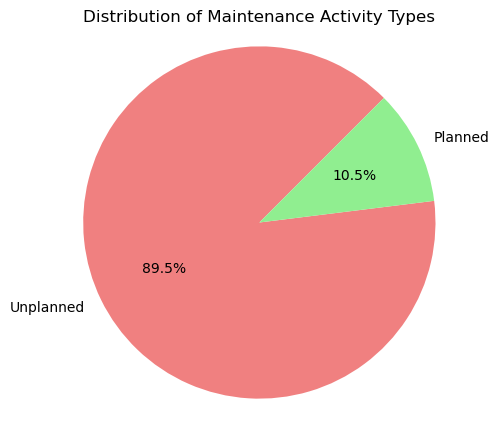

In [10]:
# Counting occurrences of each maintenance activity type
maintenance_activity_counts = iwc_df['MAINTENANCE_ACTIVITY_TYPE'].value_counts()

# Defining custom colors for planned and unplanned maintenance types
colors = ['lightcoral', 'lightgreen']  # lightgreen for planned, lightcoral for unplanned

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(maintenance_activity_counts, labels=maintenance_activity_counts.index, autopct='%1.1f%%', startangle=45, colors=colors)
plt.title('Distribution of Maintenance Activity Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


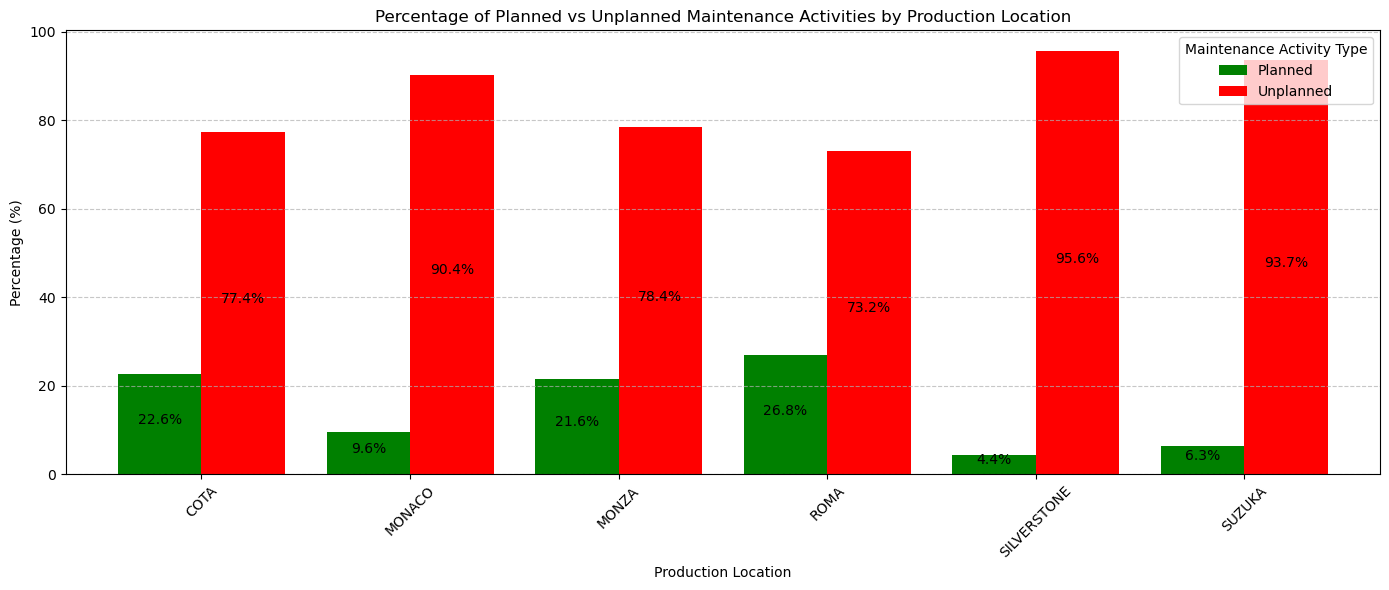

In [11]:


# Group the data by Production Location and Maintenance Activity Type, then count the occurrences
grouped_data = iwc_df.groupby(['PRODUCTION_LOCATION', 'MAINTENANCE_ACTIVITY_TYPE']).size().reset_index(name='Count')

# Calculate the total counts for each production location
total_counts = grouped_data.groupby('PRODUCTION_LOCATION')['Count'].transform('sum')

# Calculate the percentage of each maintenance activity type within each production location
grouped_data['Percentage'] = (grouped_data['Count'] / total_counts) * 100

# Pivot the data to create columns for each maintenance activity type with percentages
pivot_data = grouped_data.pivot(index='PRODUCTION_LOCATION', columns='MAINTENANCE_ACTIVITY_TYPE', values='Percentage').fillna(0)

# Define custom colors for the bars
custom_colors = ['green', 'red']

# Plotting the grouped bar plot with custom colors
ax = pivot_data.plot(kind='bar', figsize=(14, 6), color=custom_colors, width=0.8)
plt.title('Percentage of Planned vs Unplanned Maintenance Activities by Production Location')
plt.xlabel('Production Location')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Maintenance Activity Type', loc='upper right')

# Annotate each bar with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, padding=3)

plt.tight_layout()
plt.show()


In [12]:
# Converting Actual_Work_in_Minutes in to Hour to standardize time unit for comparison.

# 1. Generating a copy of the dataframe
iwc_df_copy = iwc_df.copy()

# 2. Converting 'ACTUAL_WORK_IN_MINUTES' into hours and creating a new column
iwc_df_copy['ACTUAL_WORK_IN_HOURS'] = iwc_df_copy['ACTUAL_WORK_IN_MINUTES'] / 60

# 3. Displaying the first few rows to verify the conversion
iwc_df_copy[['ACTUAL_WORK_IN_MINUTES', 'ACTUAL_WORK_IN_HOURS']].head()


,ACTUAL_WORK_IN_MINUTES,ACTUAL_WORK_IN_HOURS
0,390.0,6.5
1,420.0,7.0
2,30.0,0.5
3,60.0,1.0
4,120.0,2.0


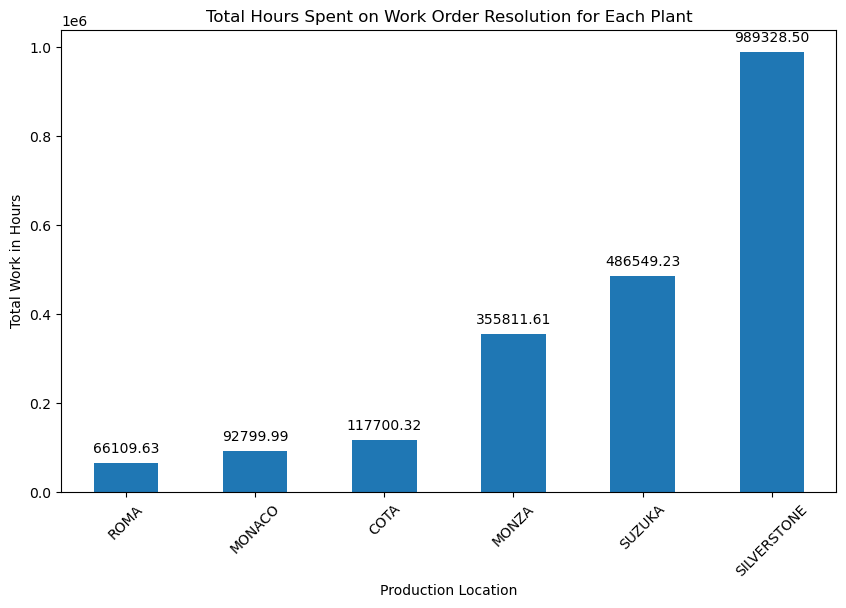

In [13]:
# Visualizing the number of Hours of the Work Orders in each production Plant.

# Grouping by PLANT_ID to sum the 'ACTUAL_WORK_IN_HOURS' for each plant and sorting in ascending order
work_hours_per_plant = iwc_df_copy.groupby('PRODUCTION_LOCATION')['ACTUAL_WORK_IN_HOURS'].sum().sort_values(ascending=True)

# Plotting the graph
plt.figure(figsize=(10,6))
ax = work_hours_per_plant.plot(kind='bar')
plt.title('Total Hours Spent on Work Order Resolution for Each Plant')
plt.xlabel('Production Location')
plt.ylabel('Total Work in Hours')
plt.xticks(rotation=45)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

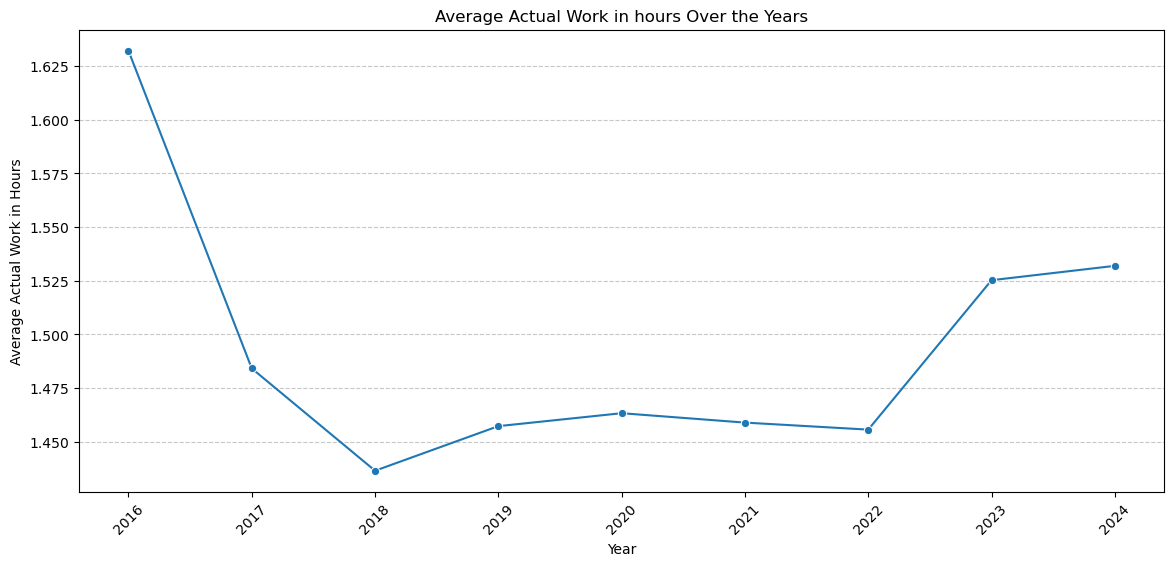

In [14]:
# Plotting a Line Plot with trend lines to show the average work time per year

import warnings
warnings.filterwarnings('ignore')

# Ensure date columns are in datetime format
iwc_df_copy['EXECUTION_FINISH_DATE'] = pd.to_datetime(iwc_df_copy['EXECUTION_FINISH_DATE'])

# Convert actual work minutes to hours
iwc_df_copy['ACTUAL_WORK_HOURS'] = iwc_df_copy['ACTUAL_WORK_IN_MINUTES'] / 60  # Convert minutes to hours

# Extract year from the execution finish date
iwc_df_copy['YEAR'] = iwc_df_copy['EXECUTION_FINISH_DATE'].dt.year


# Plotting a Line Plot with trend lines to show the average work time per year
plt.figure(figsize=(14, 6))
sns.lineplot(data=iwc_df_copy, x='YEAR', y='ACTUAL_WORK_HOURS', ci=None, estimator='mean', marker='o')
plt.title('Average Actual Work in hours Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Actual Work in Hours')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [15]:
# Counting the various types of Maintainence Type.
iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].value_counts()

MAINTENANCE_TYPE_DESCRIPTION
Preventive Maintenance Order    151533
Corrective Maintenance Order    134074
Administrative Order              6161
Capital Order                       22
Breakdown Maintenance Order          5
Name: count, dtype: int64

<Figure size 600x300 with 0 Axes>

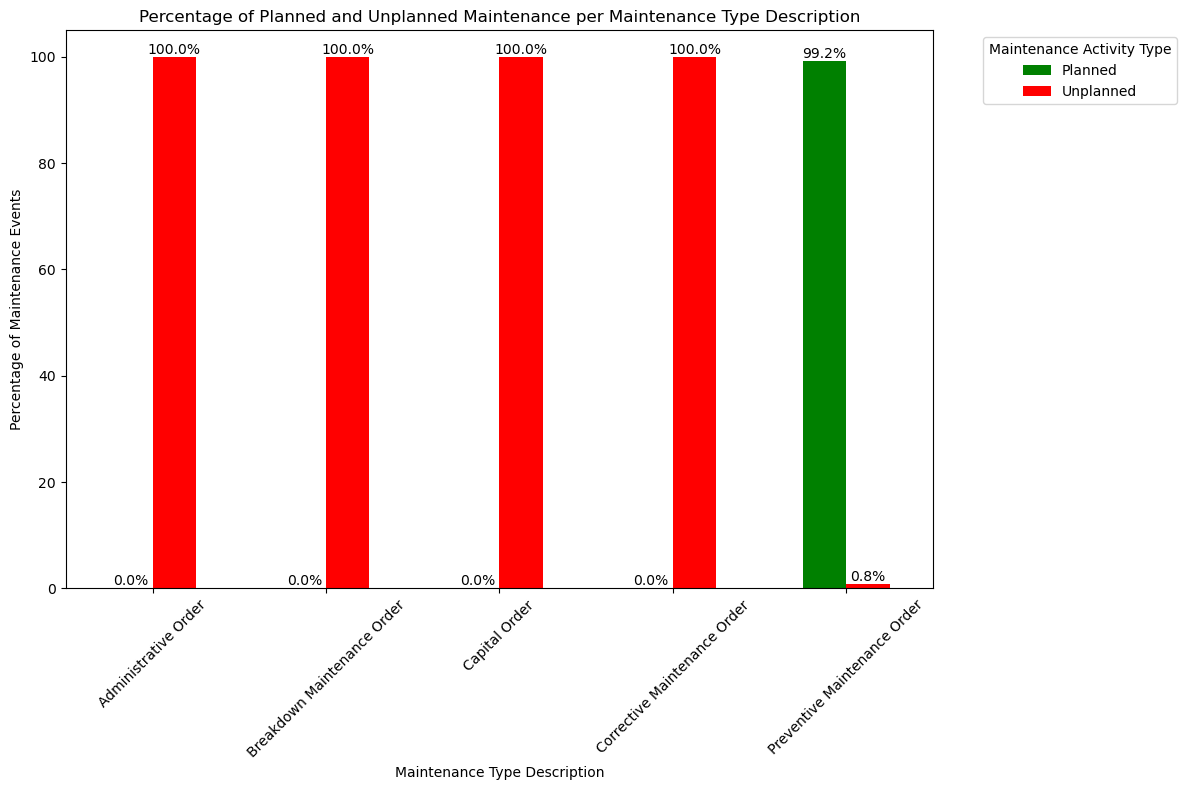

In [17]:
# Grouping by 'MAINTENANCE_TYPE_DESCRIPTION' and 'MAINTENANCE_ACTIVITY_TYPE' and counting occurrences
maintenance_type_activity_counts = iwc_df_copy.groupby(['MAINTENANCE_TYPE_DESCRIPTION', 'MAINTENANCE_ACTIVITY_TYPE']).size().unstack()

# Calculating percentages for each maintenance type description
maintenance_type_activity_percent = maintenance_type_activity_counts.div(maintenance_type_activity_counts.sum(axis=1), axis=0) * 100

# Plotting the grouped bar chart
plt.figure(figsize=(6,3))
ax = maintenance_type_activity_percent.plot(kind='bar', stacked=False, figsize=(12, 8), color=['green', 'red'])

plt.title('Percentage of Planned and Unplanned Maintenance per Maintenance Type Description')
plt.xlabel('Maintenance Type Description')
plt.ylabel('Percentage of Maintenance Events')
plt.xticks(rotation=45)

# Adding percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.legend(title='Maintenance Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**INTERPRETATION:**

As we observe that there are almost 80% missing values in the variable "Maintenance_Type_Description", we need to impute the missing values with "Breakdown Maintenance Order" as the count of the same is just 5 entries in the total dataset and as per the above graph all are unplanned maintainence activites, hence it is logical to impute all the missing values with "Breakdown Maintenance Order" as we are aiming to reduced the downtime of the machine by forecasting the breaking of the machine accurately.

In [18]:
# Imputation of Missing Values of " Maintenance_Type_Description" (80% Missing Values)

# Checking for missing values in the 'MAINTENANCE_TYPE_DESCRIPTION' column
print(iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].isnull().sum())

# Imputing missing values with 'Breakdown Maintenance Order'
iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].fillna('Breakdown Maintenance Order', inplace=True)

# Verifying the imputation
print(iwc_df_copy['MAINTENANCE_TYPE_DESCRIPTION'].isnull().sum())


1135469
0


In [19]:
# Checking for rows where MAINTENANCE_ACTIVITY_TYPE is 'Unplanned' but 'MAINTENANCE_PLAN' is not null
unplanned_with_plan = iwc_df_copy[(iwc_df_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') & (iwc_df_copy['MAINTENANCE_PLAN'].notnull())]

# Counting such instances distributed over the production location
unplanned_with_plan_by_location = unplanned_with_plan.groupby('PRODUCTION_LOCATION').size()

# Display the result
print(unplanned_with_plan_by_location)


PRODUCTION_LOCATION
COTA              4
MONZA          2118
ROMA             33
SILVERSTONE      49
SUZUKA            3
dtype: int64


**Interpretation:**

According to the data dictionary, when the `MAINTENANCE_PLAN` is null, the event should be categorized as unplanned, and vice versa. However, upon reviewing the data, we identified 2,207 instances where unplanned maintenance events were incorrectly associated with a maintenance plan, distributed across the six production locations. This discrepancy indicates potential inaccuracies in the way work orders are recorded at these production plants. These cases warrant special attention, as they suggest abnormal behavior in what should have been "planned breakdowns." While this variable may not be directly useful for modeling, as the relevant information is already captured in the `MAINTENANCE_ACTIVITY_TYPE` variable (planned or unplanned), it offers valuable operational insights. Specifically, it highlights the need for more robust preventive measures and accurate recording of work order entries to enhance operational efficiency.

In [20]:
# Checking for rows where MAINTENANCE_ACTIVITY_TYPE is 'Unplanned' but 'MAINTENANCE_ITEM' is not null
unplanned_with_item = iwc_df_copy[(iwc_df_copy['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned') & (iwc_df_copy['MAINTENANCE_ITEM'].notnull())]

# Counting such instances distributed over the production location
unplanned_with_item_by_location = unplanned_with_item.groupby('PRODUCTION_LOCATION').size()

# Display the result
print(unplanned_with_item_by_location)


PRODUCTION_LOCATION
COTA              4
MONZA          2118
ROMA             33
SILVERSTONE      49
SUZUKA            3
dtype: int64


**INTREPRETATION:**

A similar situation was observed with the MAINTENANCE_ITEM variable. Although a null value indicates unplanned maintenance, there were instances where unplanned events were associated with a maintenance item. These cases also suggest potential inaccuracies in the data recording process and should be addressed to improve data reliability and operational efficiency.

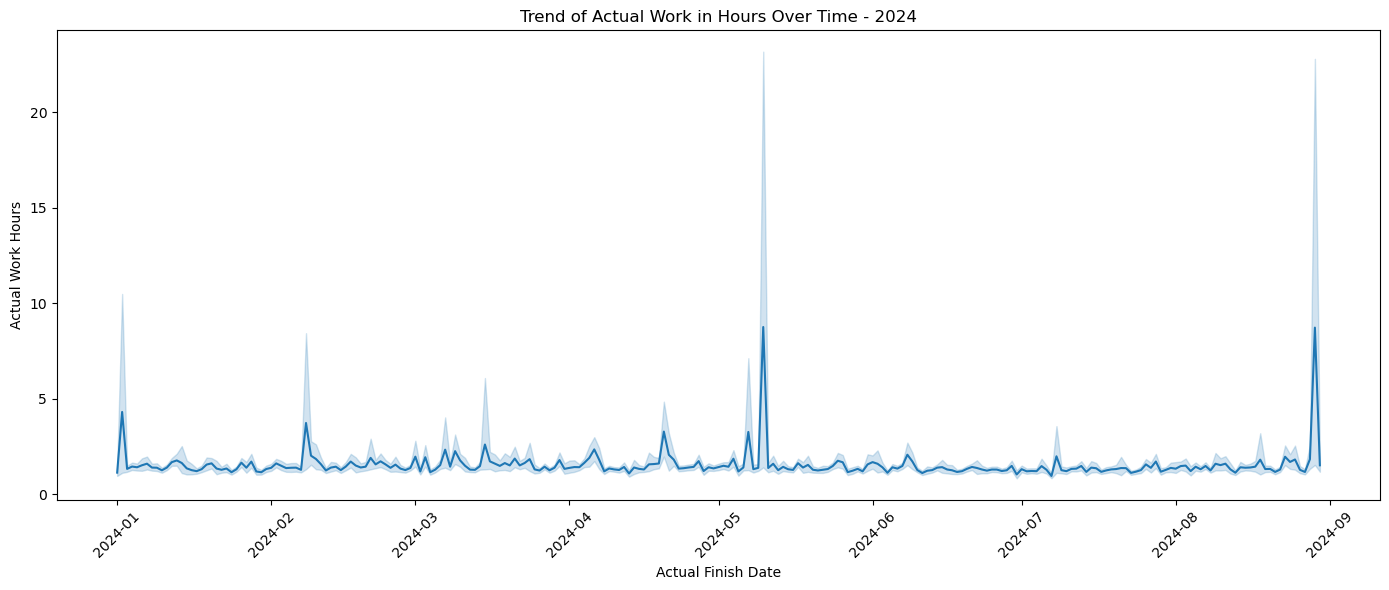

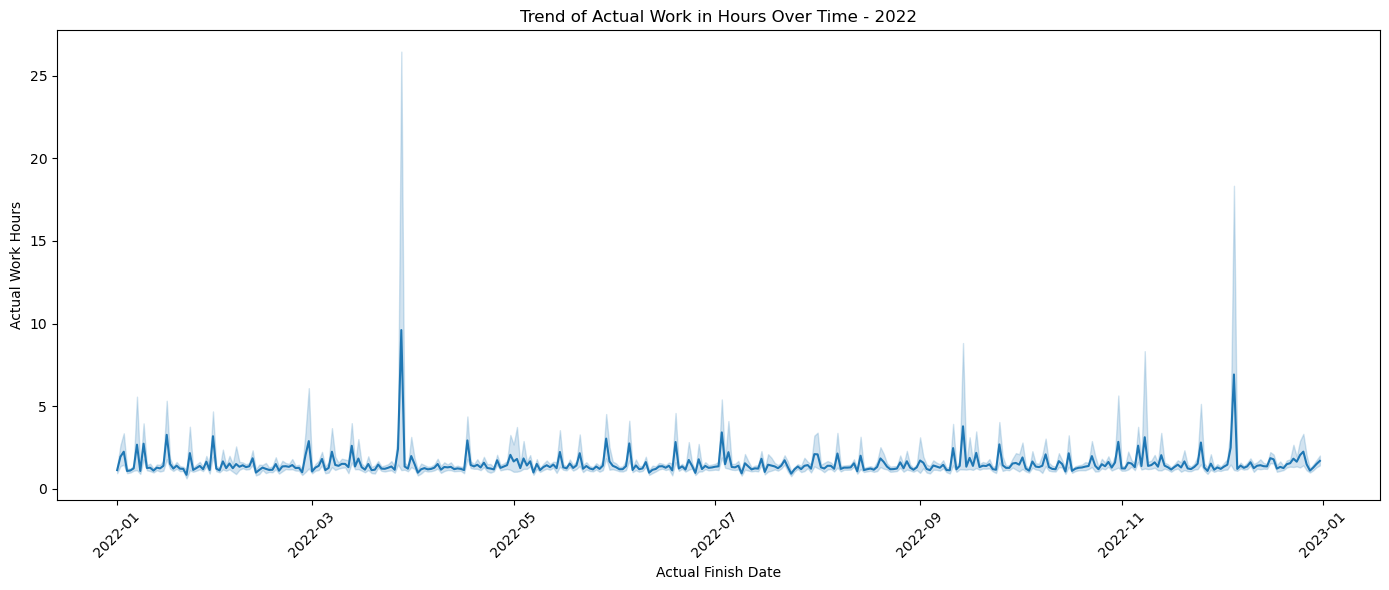

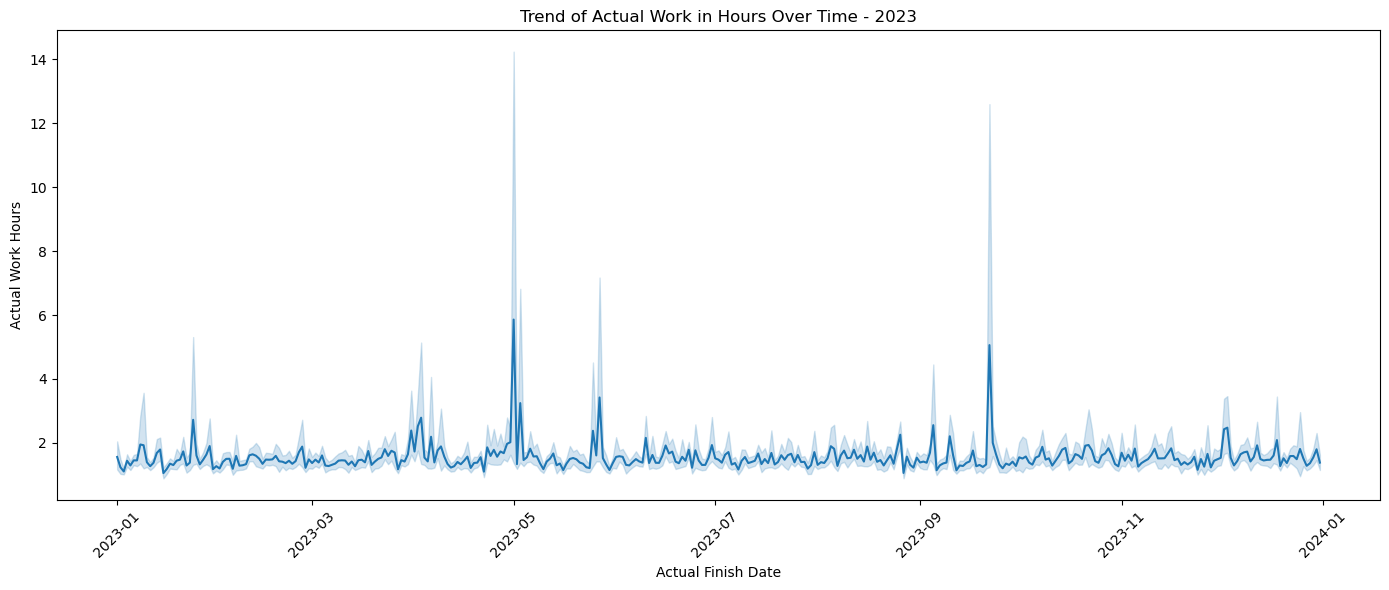

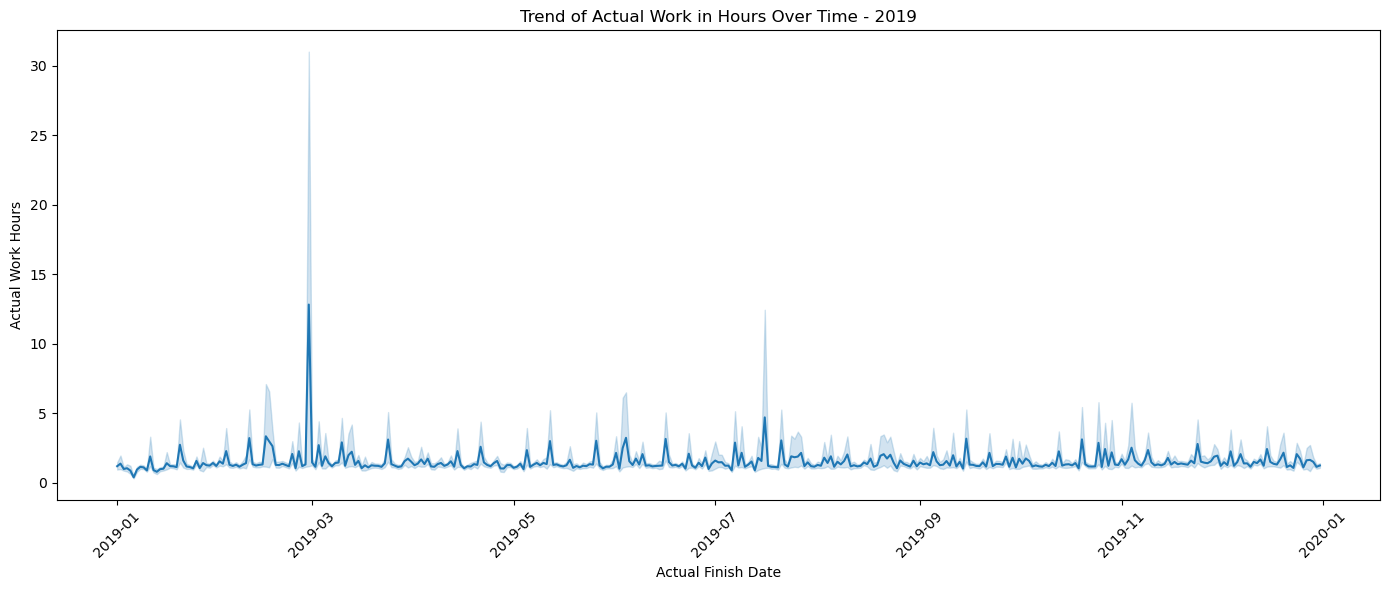

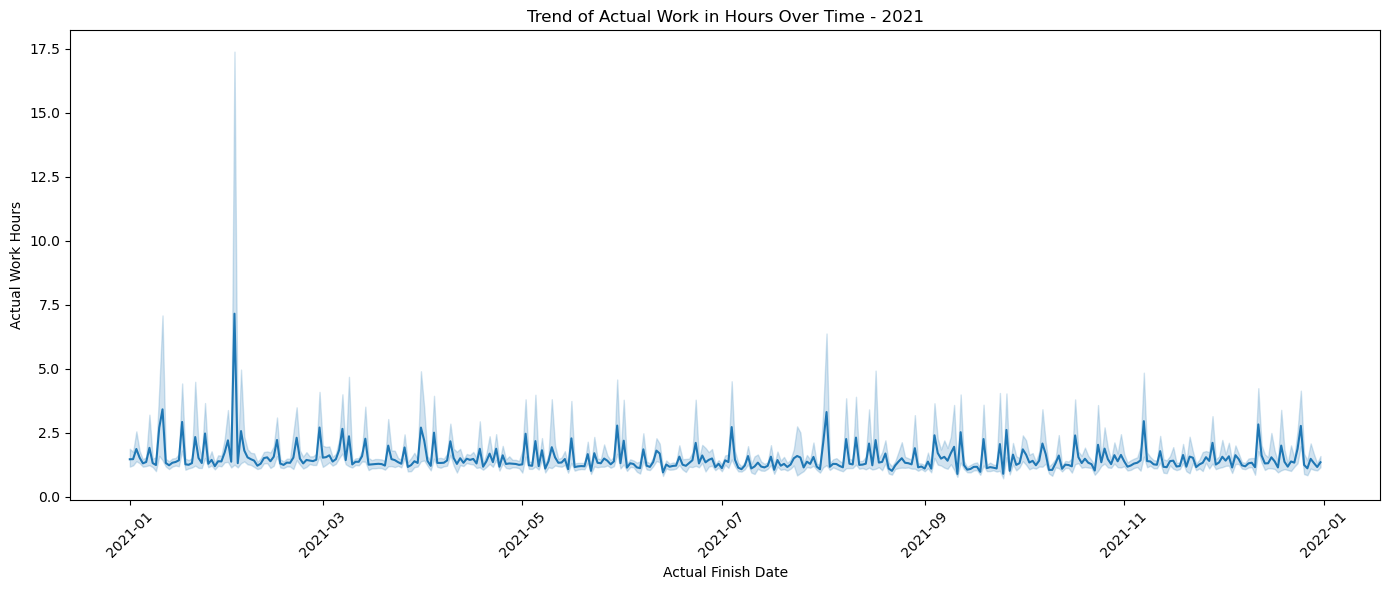

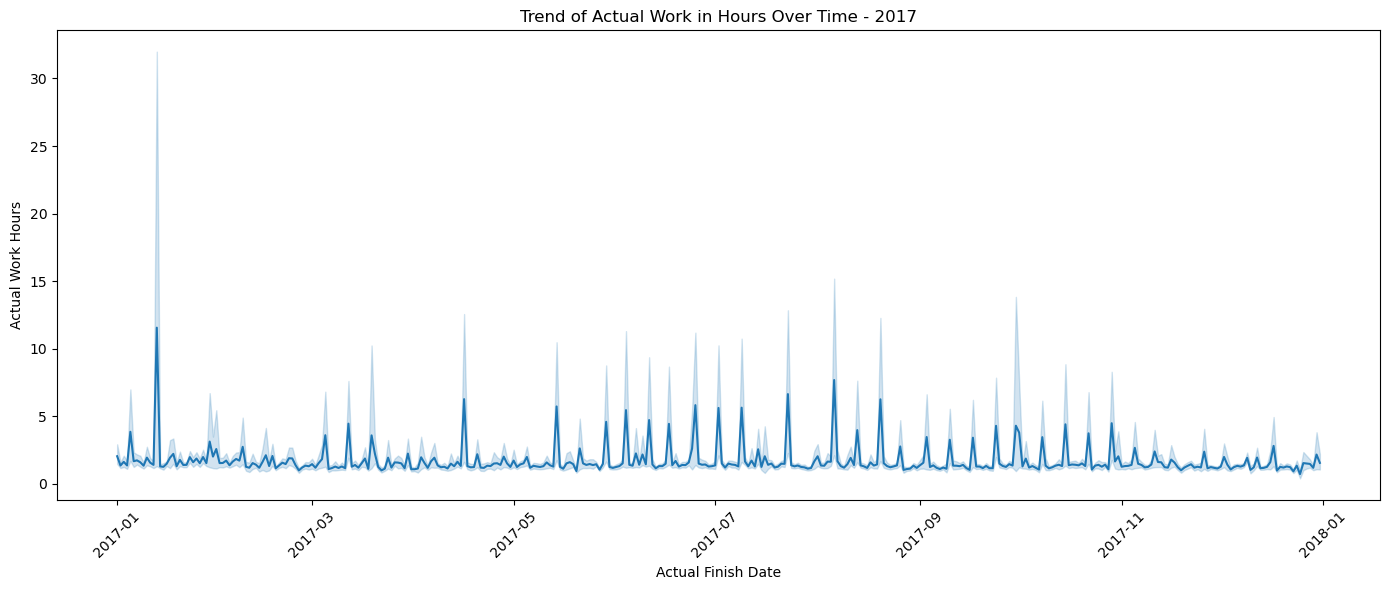

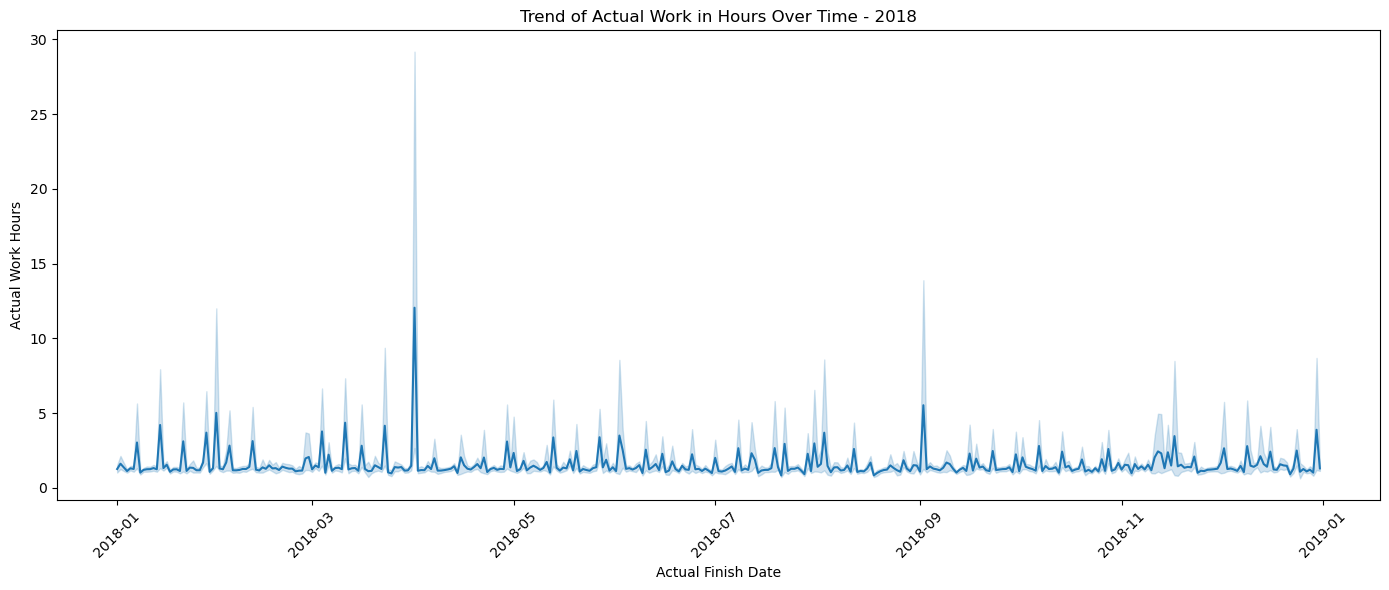

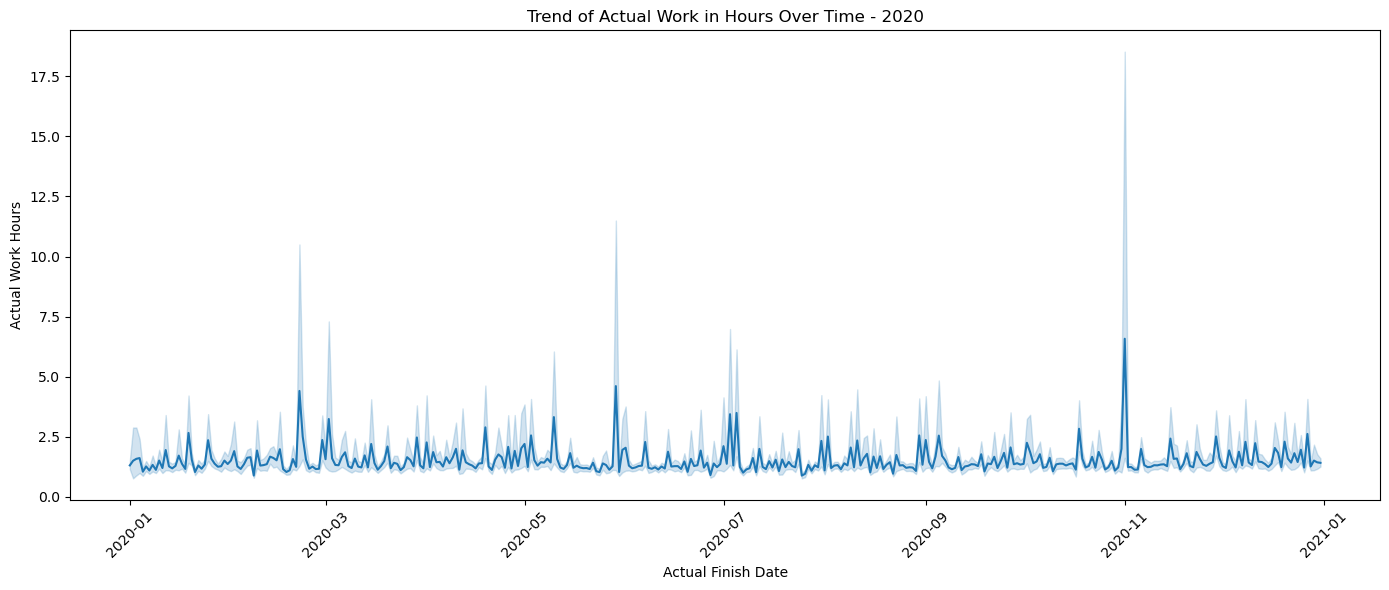

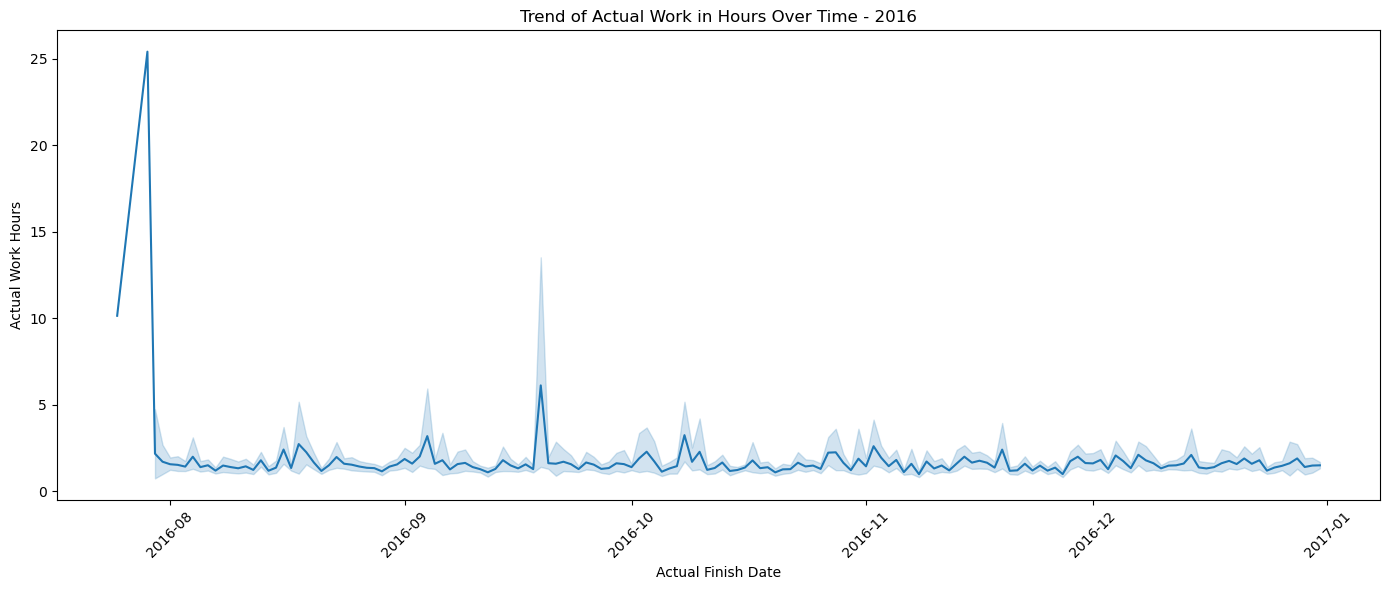

In [21]:
# Plotting the trend of actual work hours over time, separated by year

# Ensure date columns are in datetime format
iwc_df_copy['EXECUTION_FINISH_DATE'] = pd.to_datetime(iwc_df_copy['EXECUTION_FINISH_DATE'])  # Replace with the correct column name

# Convert actual work minutes to hours
iwc_df_copy['ACTUAL_WORK_HOURS'] = iwc_df_copy['ACTUAL_WORK_IN_MINUTES'] / 60  # Convert minutes to hours

# Extract year from the execution finish date
iwc_df_copy['YEAR'] = iwc_df_copy['EXECUTION_FINISH_DATE'].dt.year

# Get unique years to plot separate graphs for each year
unique_years = iwc_df_copy['YEAR'].unique()

# Plotting the trend of actual work hours over time, separated by year
for year in unique_years:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=iwc_df_copy[iwc_df_copy['YEAR'] == year], x='EXECUTION_FINISH_DATE', y='ACTUAL_WORK_HOURS')  # Corrected column name
    plt.title(f'Trend of Actual Work in Hours Over Time - {year}')
    plt.xlabel('Actual Finish Date')
    plt.ylabel('Actual Work Hours')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 3.Data Cleaning and Data Manipulation

In [5]:
# Dropping all the rows with "Equipment_ID" as NaN.
cleaned_data = iwc_df.dropna(subset=['EQUIPMENT_ID'])

In [6]:
# Imputing 'FUNCTIONAL_AREA_NODE_1_MODIFIED'


cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].value_counts()
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='MONACO']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'MONACO'),'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'MONACO PRODUCTION'
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='MONZA']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'MONZA') & (cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].isna()),'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'MONZA PRODUCTION'
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'ROMA') & (cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED']=='PRODUCTION'),'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'ROMA PRODUCTION'
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='SILVERSTONE']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'SILVERSTONE') & (cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].isna()),
       'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'SILVERSTONE PRODUCTION'
cleaned_data.loc[cleaned_data['PRODUCTION_LOCATION']=='COTA']['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()
cleaned_data.loc[(cleaned_data['PRODUCTION_LOCATION'] == 'COTA'),
       'FUNCTIONAL_AREA_NODE_1_MODIFIED'] = 'COTA PRODUCTION'



In [7]:
# Imputing 'FUNCTIONAL_AREA_NODE_2_MODIFIED'

cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].nunique()
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].value_counts()
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'AIR', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'AIR SYSTEM'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'CO2', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CO2 SYSTEM'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BOTTLE', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BOTTLE LINE'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'CAN', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CAN LINE'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'REFRIGERATION', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'REFRIGERATION SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BLENDING', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'CIP', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CIP SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'WATER', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'WATER TREATMENT'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'FACILITIES', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'FACILITIES'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'WAREHOUSE', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'WAREHOUSE'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'PRODUCTION', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'PRODUCTION'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'QUALITY', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'QUALITY ASSURANCE EQUIPMENT'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'SAFETY', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'SAFETY EQUIPMENT'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BTL_PET', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BTL_PET_LINE '
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'RECYCLING', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'RECYCLING'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'PRD LINES', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'PRD LINES'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'STEAM', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'STEAM SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'SANITATION', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'SANITATION SYSTEMS'
cleaned_data.loc[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.contains(r'BIB', na=False), 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BIB LINE'


This code imputes missing and inconsistent values in FUNCTIONAL_AREA_NODE_1_MODIFIED and FUNCTIONAL_AREA_NODE_2_MODIFIED using logical conditions based on PRODUCTION_LOCATION and keyword patterns in column values, ensuring standardized and meaningful categories for analysis. It enhances data quality for better insights and modeling.

In [8]:
# Verifying Modified Data
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].nunique()
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].value_counts()

CAN LINE                       103525
BOTTLE LINE                     87885
BTL_PET_LINE                    43989
AIR SYSTEM                       9366
WATER TREATMENT                  6631
BLENDING ROOM                    5274
REFRIGERATION SYSTEMS            4402
COMMON EQUIPMENT                 3069
RECYCLING                        2775
COOLER SERVICE HVAC              2699
CO2 SYSTEM                       2543
STEAM SYSTEMS                    2313
BIB LINE                         1197
OFFICES                           903
HEATING SYSTEMS                   805
PRD LINES                         773
FACILITIES                        711
NITROGEN SYSTEMS                  591
QUALITY ASSURANCE EQUIPMENT       503
SAFETY EQUIPMENT                  460
CIP SYSTEMS                       351
PRODUCTION                        332
SANITATION SYSTEMS                255
NEW PM PLAN                       211
WAREHOUSE                         196
GROUNDS                           174
MOBILE EQUIP

In [9]:
# Funtional Location

cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 300026806, 'FUNCTIONAL_LOC'] = 'G816-PRD-L15-L03-L130'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 300045068, 'FUNCTIONAL_LOC'] = 'G811-PRD-L30-L03-L030'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 300001115, 'FUNCTIONAL_LOC'] = 'G291-PRD-L30-L01-L070'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 400002825, 'FUNCTIONAL_LOC'] = 'G261-PRD-P25-XXX'
cleaned_data.loc[cleaned_data['EQUIPMENT_ID'] == 400002842, 'FUNCTIONAL_LOC'] = 'G261-PRD-P42-XXX'

In [10]:
# FUncational_AREA_NODE_2_MODIFIED


# Group by relevant columns
grouped = cleaned_data.groupby(
    ['EQUIPMENT_ID', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM', 'FUNCTIONAL_AREA_NODE_1_MODIFIED']
)['FUNCTIONAL_AREA_NODE_2_MODIFIED']

# Fill NaN values within each group using ffill and bfill
cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'] = (grouped.transform(lambda x: x.ffill().bfill()).combine_first(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED']))

C:\Users\hp\AppData\Local\Temp\ipykernel_27668\467278139.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'] = (grouped.transform(lambda x: x.ffill().bfill()).combine_first(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED']))


In [11]:
#FUNCTIONAL_AREA_NODE_2_MODIFIED


condition = (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna()) | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')
check_condition = condition & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\b(?:check|daily|utility|utilities|meetings|meeting|Line Walk|cleaing)\b', case=False, na=False))

# Fill FUNCTIONAL_AREA_NODE_2_MODIFIED with 'Routine Check' where the condition is met
cleaned_data.loc[check_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'Routine Check'


# Adding specific match for 'lube' and 'oil' using word boundaries
lube_oil_condition = condition & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\b(?:lube|oil)\b', case=False, na=False))

# Fill FUNCTIONAL_AREA_NODE_2_MODIFIED with 'Lubrication' where the condition is met
cleaned_data.loc[lube_oil_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'LUBRICATION'



# Can Line Update
# FUNCTIONAL_AREA_NODE_2_MODIFIED
null_or_blank_condition = cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')

condition = (cleaned_data['ORDER_DESCRIPTION'].str.contains('CAN', case=False, na=False))
a=condition&null_or_blank_condition
cleaned_data.loc[a, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CAN LINE'


condition2 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('CNG', case=False, na=False))

b=condition2&null_or_blank_condition

cleaned_data.loc[b, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'REFRIGERATION SYSTEMS'



condition3 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('Tank', case=False, na=False))

# Additional condition to check for 'COTA' in FUNCTIONAL_AREA_NODE_1_MODIFIED
cota_condition = cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].str.contains('COTA', case=False, na=False)

combined_condition = condition3 & cota_condition & null_or_blank_condition

cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'WATER TREATMENT'




condition4 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('PUMP', case=False, na=False))

# Condition to check if FUNCTIONAL_AREA_NODE_2_MODIFIED is null or blank

combined_condition = condition4 & cota_condition & null_or_blank_condition

# Update FUNCTIONAL_AREA_NODE_2_MODIFIED where all conditions are met
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'

condition6 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('SYRUP', case=False, na=False))
combined_condition = condition6  & null_or_blank_condition
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'




monaco_condition = cleaned_data['FUNCTIONAL_AREA_NODE_1_MODIFIED'].str.contains('MONACO', case=False, na=False)

condition5 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('DEPALLETIZER', case=False, na=False))


combined_condition = condition5 & monaco_condition & null_or_blank_condition

# Update FUNCTIONAL_AREA_NODE_2_MODIFIED where all conditions are met
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'CAN LINE'



condition7 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('SILO', case=False, na=False))
combined_condition = condition7  & null_or_blank_condition
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BTL_PET_LINE'



condition8 = (cleaned_data['ORDER_DESCRIPTION'].str.contains('Bastian', case=False, na=False))
combined_condition = condition8  & null_or_blank_condition
cleaned_data.loc[combined_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'AIR SYSTEM'


# Additional condition for "syrup" and "room" both in the ORDER_DESCRIPTION
syrup_room_condition = condition & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\bsyrup\b', case=False, na=False)) & (cleaned_data['ORDER_DESCRIPTION'].str.contains(r'\broom\b', case=False, na=False))

# Fill FUNCTIONAL_AREA_NODE_2_MODIFIED with 'BLENDING ROOM' where 'syrup' and 'room' are both in the ORDER_DESCRIPTION
cleaned_data.loc[syrup_room_condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = 'BLENDING ROOM'

# Grouping by EQUIPMENT_ID and counting the number of N/A or blank values in FUNCTIONAL_AREA_NODE_2_MODIFIED
na_blank_counts = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]
equipment_na_counts = na_blank_counts.groupby('EQUIPMENT_ID').size().reset_index(name='na_blank_count')

# Sorting the result to find the EQUIPMENT_ID with the most N/A or blank values
equipment_na_counts_sorted = equipment_na_counts.sort_values(by='na_blank_count', ascending=False)

equipment_na_counts_sorted.head()









,EQUIPMENT_ID,na_blank_count
38,300017654.0,1587
131,300224439.0,1202
136,300239802.0,187
46,300026992.0,79
125,300045283.0,68


In [12]:
# Step 1: Find rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is not null or blank, to use for matching
non_null_functional_area = cleaned_data[~(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == ''))]

# Create a mapping of FUNCTIONAL_LOC to FUNCTIONAL_AREA_NODE_2_MODIFIED from non-null rows
functional_loc_map = dict(zip(non_null_functional_area['FUNCTIONAL_LOC'], non_null_functional_area['FUNCTIONAL_AREA_NODE_2_MODIFIED']))

# Step 2: Filter rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is null or blank and FUNCTIONAL_LOC exists
null_functional_area = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]

# Step 3: Check if FUNCTIONAL_LOC exists in the mapping (before filling)
preview_fill = null_functional_area[null_functional_area['FUNCTIONAL_LOC'].isin(functional_loc_map.keys())]

# Step 4: Preview the results before filling
preview_fill[['FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_2_MODIFIED']].head()


# Step 4: Provide unique FUNCTIONAL_LOC and FUNCTIONAL_AREA_NODE_2_MODIFIED pairs before filling
unique_preview_fill = preview_fill[['FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_2_MODIFIED']].drop_duplicates()

print(unique_preview_fill)


# Step 1: Filter rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is N/A or blank
na_or_blank_functional_area = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]

# Step 2: Extract ORDER_DESCRIPTION as a list of sentences from these rows
blank_sentences = na_or_blank_functional_area['ORDER_DESCRIPTION'].dropna().tolist()

# Step 3: Filter rows where FUNCTIONAL_AREA_NODE_2_MODIFIED is not blank (filled)
filled_functional_area = cleaned_data[~(cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna()) & (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() != '')]

# Step 4: Create a mapping of ORDER_DESCRIPTION to FUNCTIONAL_AREA_NODE_2_MODIFIED from filled rows
description_to_functional_area_map = dict(zip(filled_functional_area['ORDER_DESCRIPTION'], filled_functional_area['FUNCTIONAL_AREA_NODE_2_MODIFIED']))

# Step 5: Compare sentences and infer FUNCTIONAL_AREA_NODE_2_MODIFIED for blank rows
for sentence in blank_sentences:
    if sentence in description_to_functional_area_map:
        # Find matching sentence and assign the corresponding FUNCTIONAL_AREA_NODE_2_MODIFIED
        cleaned_data.loc[cleaned_data['ORDER_DESCRIPTION'] == sentence, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = description_to_functional_area_map[sentence]

updated_data = cleaned_data[cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')]

                     FUNCTIONAL_LOC FUNCTIONAL_AREA_NODE_2_MODIFIED
41298                      G812-PRD                             NaN
42057                      G816-PRD                             NaN
42218    G811-PRD-L30-L03-L030-0020                             NaN
43248         G811-PRD-L30-L02-L060                             NaN
43267                      G221-PRD                             NaN
45212         G811-PRD-L35-L04-L080                             NaN
45589              G291-PRD-L30-S01                             NaN
46613         G811-PRD-L30-L03-L060                             NaN
47890                      G811-PRD                             NaN
48133         G291-PRD-P80-XXX-S190                             NaN
48139                      G291-PRD                             NaN
85831         G816-PRD-L15-L03-L130                             NaN
86939         G811-PRD-P80-XXX-S210                             NaN
90782         G291-PRD-P40-XXX-S020             

This code addresses missing or inconsistent values in the FUNCTIONAL_AREA_NODE_2_MODIFIED column by leveraging a combination of keyword-based conditions and mappings. It uses ORDER_DESCRIPTION and FUNCTIONAL_LOC to infer appropriate functional areas, ensuring data consistency and enhancing the quality of the dataset for subsequent analysis.

In [13]:
# Calculation of the percentage of missing values in the entire dataset.
missing_values_percentage = (cleaned_data.isnull().sum() / len(cleaned_data)) * 100
print(missing_values_percentage)

ORDER_ID                            0.000000
PLANT_ID                            0.000000
PRODUCTION_LOCATION                 0.000000
EXECUTION_START_DATE                0.000000
EXECUTION_FINISH_DATE               0.000000
ACTUAL_START_TIME                   0.000000
ACTUAL_FINISH_TIME                  0.000000
ACTUAL_WORK_IN_MINUTES              0.000000
MAINTENANCE_PLAN                   47.705067
MAINTENANCE_ITEM                   47.705067
MAINTENANCE_ACTIVITY_TYPE           0.000000
ORDER_DESCRIPTION                   0.009596
MAINTENANCE_TYPE_DESCRIPTION        0.000000
FUNCTIONAL_LOC                      0.000000
FUNCTIONAL_AREA_NODE_1_MODIFIED     0.000000
FUNCTIONAL_AREA_NODE_2_MODIFIED     1.162117
FUNCTIONAL_AREA_NODE_3_MODIFIED    11.344951
FUNCTIONAL_AREA_NODE_4_MODIFIED    18.582224
FUNCTIONAL_AREA_NODE_5_MODIFIED    99.252900
EQUIPMENT_ID                        0.000000
EQUIPMENT_DESC                     72.773008
EQUIP_CAT_DESC                     72.773008
EQUIP_STAR

In [17]:
# VALID FROM, VALID TO, START UP DATE
date_columns = ['EQUIP_VALID_FROM', 'EQUIP_START_UP_DATE']  # Add other date columns as needed

# Convert each column to datetime format
for column in date_columns:
    cleaned_data[column] = pd.to_datetime(cleaned_data[column], errors='coerce')

cleaned_data['EQUIP_VALID_TO'] = pd.to_datetime('15-12-2024', format='%d-%m-%Y')

# Fill null or N/A values in the 'EQUIP_VALID_FROM' column with '12/10/2024'
cleaned_data['EQUIP_VALID_FROM'] = pd.to_datetime(cleaned_data['EQUIP_VALID_FROM'], errors='coerce')  # Ensure it's in datetime format
cleaned_data['EQUIP_VALID_FROM'].fillna(pd.to_datetime('12/10/2024', format='%d/%m/%Y'), inplace=True)

cleaned_data[['EQUIPMENT_ID','EQUIP_VALID_FROM','EXECUTION_START_DATE']].head()



C:\Users\hp\AppData\Local\Temp\ipykernel_27668\3457204880.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = pd.to_datetime(cleaned_data[column], errors='coerce')
C:\Users\hp\AppData\Local\Temp\ipykernel_27668\3457204880.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = pd.to_datetime(cleaned_data[column], errors='coerce')
C:\Users\hp\AppData\Local\Temp\ipykernel_27668\3457204880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,EQUIPMENT_ID,EQUIP_VALID_FROM,EXECUTION_START_DATE
0,300126812.0,2020-02-10,2024-05-04
1,300126812.0,2020-02-10,2022-09-13
2,300126812.0,2020-02-10,2022-12-21
3,300126812.0,2020-02-10,2022-07-04
4,300001088.0,2023-12-11,2023-03-15


In [16]:
import pandas as pd

# Convert both columns to datetime format to ensure consistency
cleaned_data['EQUIP_VALID_FROM'] = pd.to_datetime(cleaned_data['EQUIP_VALID_FROM'], format='%d/%m/%Y', errors='coerce')
cleaned_data['EXECUTION_START_DATE'] = pd.to_datetime(cleaned_data['EXECUTION_START_DATE'], errors='coerce')

# Identify rows where EQUIP_VALID_FROM is '12/10/2024'
condition = cleaned_data['EQUIP_VALID_FROM'] == pd.Timestamp('2024-10-12')

# Replace '12/10/2024' in EQUIP_VALID_FROM with the corresponding date in EXECUTION_START_DATE
cleaned_data.loc[condition, 'EQUIP_VALID_FROM'] = cleaned_data.loc[condition, 'EXECUTION_START_DATE']

cleaned_data[['EQUIP_VALID_FROM', 'EQUIP_START_UP_DATE']].head(20)


C:\Users\hp\AppData\Local\Temp\ipykernel_27668\1329841439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['EQUIP_VALID_FROM'] = pd.to_datetime(cleaned_data['EQUIP_VALID_FROM'], format='%d/%m/%Y', errors='coerce')
C:\Users\hp\AppData\Local\Temp\ipykernel_27668\1329841439.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['EXECUTION_START_DATE'] = pd.to_datetime(cleaned_data['EXECUTION_START_DATE'], errors='coerce')


,EQUIP_VALID_FROM,EQUIP_START_UP_DATE
0,2020-02-10,2020-04-22
1,2020-02-10,2020-04-22
2,2020-02-10,2020-04-22
3,2020-02-10,2020-04-22
4,2023-12-11,2017-02-15
5,2023-12-11,2017-02-15
6,2023-12-11,2017-02-15
7,2023-12-11,2017-02-15
8,2023-12-11,2017-02-15
9,2023-12-11,2017-02-15


In [117]:
# Ensure both columns are in datetime format
cleaned_data['EQUIP_START_UP_DATE'] = pd.to_datetime(cleaned_data['EQUIP_START_UP_DATE'], errors='coerce')
cleaned_data['EQUIP_VALID_FROM'] = pd.to_datetime(cleaned_data['EQUIP_VALID_FROM'], errors='coerce')

# Calculate the difference in days between EQUIP_VALID_FROM and EQUIP_START_UP_DATE
date_diff = (cleaned_data['EQUIP_VALID_FROM'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days

# Identify rows where the difference is negative
negative_diff_condition = date_diff < 0

# Update EQUIP_START_UP_DATE to match EQUIP_VALID_FROM where the difference is negative
cleaned_data.loc[negative_diff_condition, 'EQUIP_START_UP_DATE'] = cleaned_data.loc[negative_diff_condition, 'EQUIP_VALID_FROM']

# Verify the changes by checking the first few rows where EQUIP_START_UP_DATE was updated
cleaned_data[negative_diff_condition][['EQUIP_START_UP_DATE', 'EQUIP_VALID_FROM']].head()

# Step 1: Calculate the difference in days between EQUIP_START_UP_DATE and EQUIP_VALID_FROM
date_diff = (cleaned_data['EQUIP_VALID_FROM'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days


# Step 2: Find the mean of the differences where both dates are available
mean_diff_days = date_diff.mean()

# Print the mean difference
print(f'Mean difference in days: {mean_diff_days}')

# Step 3: Fill missing values in EQUIP_START_UP_DATE using the mean difference (without time component)
condition = cleaned_data['EQUIP_START_UP_DATE'].isna()  # Identify rows where EQUIP_START_UP_DATE is NaN
cleaned_data.loc[condition, 'EQUIP_START_UP_DATE'] = (cleaned_data['EQUIP_VALID_FROM'] - pd.to_timedelta(mean_diff_days, unit='days')).dt.date



Mean difference in days: 230.40127144056615


This code standardizes and aligns date columns like EQUIP_VALID_FROM and EQUIP_START_UP_DATE by converting them to a consistent format, imputing missing values using logical defaults and mean differences, and correcting inconsistencies where dates are out of sequence. This ensures data completeness and reliability for further analysis.

In [ ]:
# For Functional 3

In [136]:
# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_1_MODIFIED','FUNCTIONAL_AREA_NODE_2_MODIFIED'])['FUNCTIONAL_AREA_NODE_3_MODIFIED'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['FUNCTIONAL_AREA_NODE_3_MODIFIED'].isna()
cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_3_MODIFIED'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'],row['FUNCTIONAL_AREA_NODE_1_MODIFIED'], row['FUNCTIONAL_AREA_NODE_2_MODIFIED'])), axis=1
)



In [92]:
# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_5_MODIFIED'])['FUNCTIONAL_AREA_NODE_3_MODIFIED'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['FUNCTIONAL_AREA_NODE_3_MODIFIED'].isna()
cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_3_MODIFIED'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'],row['FUNCTIONAL_AREA_NODE_5_MODIFIED'])), axis=1
)



In [108]:
# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'MAINTENANCE_PLAN'])['FUNCTIONAL_AREA_NODE_3_MODIFIED'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['FUNCTIONAL_AREA_NODE_3_MODIFIED'].isna()
cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_3_MODIFIED'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'],row['MAINTENANCE_PLAN'])), axis=1
)



This code addresses missing values in FUNCTIONAL_AREA_NODE_3_MODIFIED by grouping the data with relevant columns like EQUIPMENT_ID, FUNCTIONAL_AREA_NODE_1_MODIFIED, FUNCTIONAL_AREA_NODE_2_MODIFIED, FUNCTIONAL_AREA_NODE_5_MODIFIED, or MAINTENANCE_PLAN to find the most frequent associated value. These grouped associations are then used to impute missing values, ensuring consistency and improving data completeness.

In [ ]:
# For Functional 4

In [148]:
# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_1_MODIFIED','FUNCTIONAL_AREA_NODE_2_MODIFIED','FUNCTIONAL_AREA_NODE_3_MODIFIED'])['FUNCTIONAL_AREA_NODE_4_MODIFIED'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['FUNCTIONAL_AREA_NODE_4_MODIFIED'].isna()
cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_4_MODIFIED'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'],row['FUNCTIONAL_AREA_NODE_1_MODIFIED'], row['FUNCTIONAL_AREA_NODE_2_MODIFIED'], row['FUNCTIONAL_AREA_NODE_3_MODIFIED'])), axis=1
)



In [100]:
# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_5_MODIFIED'])['FUNCTIONAL_AREA_NODE_4_MODIFIED'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['FUNCTIONAL_AREA_NODE_4_MODIFIED'].isna()
cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_4_MODIFIED'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'],row['FUNCTIONAL_AREA_NODE_5_MODIFIED'])), axis=1
)



In [114]:
# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'MAINTENANCE_ITEM'])['FUNCTIONAL_AREA_NODE_4_MODIFIED'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['FUNCTIONAL_AREA_NODE_4_MODIFIED'].isna()
cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_4_MODIFIED'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'],row['MAINTENANCE_ITEM'])), axis=1
)



This code imputes missing values in FUNCTIONAL_AREA_NODE_4_MODIFIED by grouping similar equipment and functional area combinations to identify the most frequent value (mode). It uses these group-based mappings to fill missing entries, ensuring consistency and relevance in the dataset.

In [28]:
# FOR FUNCTIONAL 5

In [96]:
# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_4_MODIFIED'])['EQUIPMENT_DESC'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['EQUIPMENT_DESC'].isna()
cleaned_data.loc[condition, 'EQUIPMENT_DESC'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'], row['FUNCTIONAL_AREA_NODE_4_MODIFIED'])), axis=1
)

cleaned_data[['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_4_MODIFIED', 'EQUIPMENT_DESC']].head()

# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_4_MODIFIED'])['FUNCTIONAL_AREA_NODE_5_MODIFIED'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].isna()
cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_5_MODIFIED'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'], row['FUNCTIONAL_AREA_NODE_4_MODIFIED'])), axis=1
)



# Case 1: If FUNCTIONAL_AREA_NODE_5_MODIFIED is not null but EQUIPMENT_DESC is null, fill EQUIPMENT_DESC with FUNCTIONAL_AREA_NODE_5_MODIFIED
condition1 = cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].notna() & cleaned_data['EQUIPMENT_DESC'].isna()
cleaned_data.loc[condition1, 'EQUIPMENT_DESC'] = cleaned_data.loc[condition1, 'FUNCTIONAL_AREA_NODE_5_MODIFIED']

# Case 2: If EQUIPMENT_DESC is not null but FUNCTIONAL_AREA_NODE_5_MODIFIED is null, fill FUNCTIONAL_AREA_NODE_5_MODIFIED with EQUIPMENT_DESC
condition2 = cleaned_data['EQUIPMENT_DESC'].notna() & cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].isna()
cleaned_data.loc[condition2, 'FUNCTIONAL_AREA_NODE_5_MODIFIED'] = cleaned_data.loc[condition2, 'EQUIPMENT_DESC']

cleaned_data[['FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_DESC']].head()


,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_DESC
0,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
1,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
2,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
3,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
4,TANK_STL_STOR_AIR,TANK_STL_STOR_AIR


In [104]:
# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_1_MODIFIED','FUNCTIONAL_AREA_NODE_2_MODIFIED'])['EQUIPMENT_DESC'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['EQUIPMENT_DESC'].isna()
cleaned_data.loc[condition, 'EQUIPMENT_DESC'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'], row['FUNCTIONAL_AREA_NODE_1_MODIFIED'],row['FUNCTIONAL_AREA_NODE_2_MODIFIED'])), axis=1
)

cleaned_data[['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_4_MODIFIED', 'EQUIPMENT_DESC']].head()

# Step 1: Group by equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED and find the most frequent FUNCTIONAL_AREA_NODE_5_MODIFIED
grouped = cleaned_data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_1_MODIFIED','FUNCTIONAL_AREA_NODE_2_MODIFIED'])['FUNCTIONAL_AREA_NODE_5_MODIFIED'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Step 2: Create a dictionary to map equipment_id and FUNCTIONAL_AREA_NODE_4_MODIFIED to FUNCTIONAL_AREA_NODE_5_MODIFIED
mapping = grouped.to_dict()

# Step 3: Fill the missing values in FUNCTIONAL_AREA_NODE_5_MODIFIED based on the mapping
condition = cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].isna()
cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_5_MODIFIED'] = cleaned_data.loc[condition].apply(
    lambda row: mapping.get((row['EQUIPMENT_ID'], row['FUNCTIONAL_AREA_NODE_1_MODIFIED'],row['FUNCTIONAL_AREA_NODE_2_MODIFIED'])), axis=1
)


# Case 1: If FUNCTIONAL_AREA_NODE_5_MODIFIED is not null but EQUIPMENT_DESC is null, fill EQUIPMENT_DESC with FUNCTIONAL_AREA_NODE_5_MODIFIED
condition1 = cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].notna() & cleaned_data['EQUIPMENT_DESC'].isna()
cleaned_data.loc[condition1, 'EQUIPMENT_DESC'] = cleaned_data.loc[condition1, 'FUNCTIONAL_AREA_NODE_5_MODIFIED']

# Case 2: If EQUIPMENT_DESC is not null but FUNCTIONAL_AREA_NODE_5_MODIFIED is null, fill FUNCTIONAL_AREA_NODE_5_MODIFIED with EQUIPMENT_DESC
condition2 = cleaned_data['EQUIPMENT_DESC'].notna() & cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].isna()
cleaned_data.loc[condition2, 'FUNCTIONAL_AREA_NODE_5_MODIFIED'] = cleaned_data.loc[condition2, 'EQUIPMENT_DESC']

# Verify the changes
cleaned_data[['FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_DESC']].head()


,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_DESC
0,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
1,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
2,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
3,FULL CAN CONVEYOR,FULL CAN CONVEYOR (FC41B)
4,TANK_STL_STOR_AIR,TANK_STL_STOR_AIR


In [98]:
# Check for rows where FUNCTIONAL_AREA_NODE_5_MODIFIED is not null and EQUIPMENT_DESC is null
condition = cleaned_data['FUNCTIONAL_AREA_NODE_5_MODIFIED'].notna() & cleaned_data['EQUIPMENT_DESC'].isna()

count = condition.sum()

print(f"Number of rows where FUNCTIONAL_AREA_NODE_5_MODIFIED is not null but EQUIPMENT_DESC is null: {count}")


Number of rows where FUNCTIONAL_AREA_NODE_5_MODIFIED is not null but EQUIPMENT_DESC is null: 0


In [86]:
# ORDER DESCRIPTION

cleaned_data['ORDER_DESCRIPTION'] = cleaned_data['ORDER_DESCRIPTION'].combine_first(cleaned_data['EQUIPMENT_DESC'])
cleaned_data['ORDER_DESCRIPTION'] = cleaned_data['ORDER_DESCRIPTION'].combine_first(cleaned_data['FUNCTIONAL_AREA_NODE_3_MODIFIED'])

remaining_missing_order_desc = cleaned_data['ORDER_DESCRIPTION'].isnull().sum()
remaining_missing_order_desc

3

In [199]:
# Removing Columns

# Dropping the specified columns
cleaned_data = cleaned_data.drop(['EQUIP_CAT_DESC'], axis=1)

# Verify the columns have been dropped
cleaned_data.head()


,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,...,EQUIPMENT_ID,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,TIME_TO_FIRST_USE,TOTAL_LIFESPAN,USABLE_DURATION,TIME_USED_TO_LIFESPAN_RATIO,MAINTENANCE_FREQUENCY,MAINTENANCE_DURATION_DEVIATION
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,Unplanned,L2 GEARBOX LEAK (SEE ATTACHED),...,300126812.0,2020-02-10,2020-02-10,2024-12-15,0,1770,1770,0.000153,4,165.0
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,Unplanned,LINE 3 CONVEYOR AT CAN CODER,...,300126812.0,2020-02-10,2020-02-10,2024-12-15,0,1770,1770,0.000165,4,195.0
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,Unplanned,BROKEN CONVEYOR RAIL,...,300126812.0,2020-02-10,2020-02-10,2024-12-15,0,1770,1770,0.000012,4,-195.0
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,Unplanned,LINE 3 CONVEYOR,...,300126812.0,2020-02-10,2020-02-10,2024-12-15,0,1770,1770,0.000024,4,-165.0
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,Unplanned,REPLACED SONIC AIR BLOWER BELT,...,300001088.0,2017-02-15,2023-12-11,2024-12-15,2490,2860,370,0.000029,3,-86.0


In [134]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np



# Step 1: Define a condition for rows with missing FUNCTIONAL_AREA_NODE_2_MODIFIED
condition = (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].isna()) | (cleaned_data['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.strip() == '')

# Step 2: Separate rows with and without missing values in FUNCTIONAL_AREA_NODE_2_MODIFIED
data_with_values = cleaned_data[~condition]
data_missing_values = cleaned_data[condition]

# Confirm if there are any rows in each subset
if len(data_with_values) == 0 or len(data_missing_values) == 0:
    print("No rows to process for one of the subsets.")
else:
    # Step 3: Vectorize ORDER_DESCRIPTION using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(cleaned_data['ORDER_DESCRIPTION'].fillna(''))

    # Step 4: Find the TF-IDF vectors for rows with and without missing FUNCTIONAL_AREA_NODE_2_MODIFIED
    tfidf_with_values = tfidf_matrix[~condition]
    tfidf_missing_values = tfidf_matrix[condition]

    # Step 5: Calculate cosine similarity only if valid data is available
    if tfidf_missing_values.shape[0] > 0 and tfidf_with_values.shape[0] > 0:
        similarity_matrix = cosine_similarity(tfidf_missing_values, tfidf_with_values)

        # Step 6: For each missing row, find the most similar row with a known FUNCTIONAL_AREA_NODE_2_MODIFIED
        most_similar_indices = np.argmax(similarity_matrix, axis=1)
        predicted_values = data_with_values.iloc[most_similar_indices]['FUNCTIONAL_AREA_NODE_2_MODIFIED'].values

        # Step 7: Fill the missing FUNCTIONAL_AREA_NODE_2_MODIFIED values
        cleaned_data.loc[condition, 'FUNCTIONAL_AREA_NODE_2_MODIFIED'] = predicted_values

        # Optional: Verify the changes by checking a few rows where values were filled
        filled_rows = cleaned_data[condition][['ORDER_DESCRIPTION', 'FUNCTIONAL_AREA_NODE_2_MODIFIED']]
        print(filled_rows.head())

    else:
        print("Insufficient data for similarity comparison.")


                          ORDER_DESCRIPTION FUNCTIONAL_AREA_NODE_2_MODIFIED
6232      CAR LOG CO69I18 FILLER ROOM FLOOR                        CAN LINE
6233    EXPOSED INSULATION AT MIX STATION 3                SAFETY EQUIPMENT
6241  REPLACED CHORDS FOR ALL FLOOR BUFFERS                        CAN LINE
6242                     WALL NEEDS PAINTED                      AIR SYSTEM
6245              TEST <(>,,<)><(>,,<)>..MM                        CAN LINE


This code utilizes TF-IDF vectorization and cosine similarity to impute missing values in the FUNCTIONAL_AREA_NODE_2_MODIFIED column based on the ORDER_DESCRIPTION text. It calculates the similarity between rows with known and missing values, filling the missing entries with the most similar row's functional area node, ensuring contextually relevant imputations.

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np

# Define a condition for rows with missing FUNCTIONAL_AREA_NODE_3_MODIFIED
condition_3 = (cleaned_data['FUNCTIONAL_AREA_NODE_3_MODIFIED'].isna()) | (cleaned_data['FUNCTIONAL_AREA_NODE_3_MODIFIED'].str.strip() == '')

# Separate rows with and without missing values in FUNCTIONAL_AREA_NODE_3_MODIFIED
data_with_values_3 = cleaned_data[~condition_3]
data_missing_values_3 = cleaned_data[condition_3]

# Vectorize ORDER_DESCRIPTION using TF-IDF
vectorizer_3 = TfidfVectorizer(stop_words='english')
tfidf_matrix_3 = vectorizer_3.fit_transform(cleaned_data['ORDER_DESCRIPTION'].fillna(''))

# Apply NearestNeighbors to find the closest non-missing FUNCTIONAL_AREA_NODE_3_MODIFIED values
nbrs = NearestNeighbors(n_neighbors=1, metric='cosine').fit(tfidf_matrix_3[~condition_3])
distances, indices = nbrs.kneighbors(tfidf_matrix_3[condition_3])

# Fill the missing values based on nearest neighbors
predicted_values_3 = data_with_values_3.iloc[indices.flatten()]['FUNCTIONAL_AREA_NODE_3_MODIFIED'].values
cleaned_data.loc[condition_3, 'FUNCTIONAL_AREA_NODE_3_MODIFIED'] = predicted_values_3

filled_rows_3 = cleaned_data[condition_3][['ORDER_DESCRIPTION', 'FUNCTIONAL_AREA_NODE_3_MODIFIED']]
print(filled_rows_3.head())


                           ORDER_DESCRIPTION FUNCTIONAL_AREA_NODE_3_MODIFIED
4             REPLACED SONIC AIR BLOWER BELT               LINE 2 LARGET PET
5   TANKS AIR STORAGE FOR MECH WHILE SHUTDOW                   SYRUP_STORAGE
6                                    REPLACE       LINE #4-FILLER_ROTARY_CAN
71     WEEKLY BOTTLE BURST TESTER INSPECTION       LINE #4 - BOTTLE_LINE_PET
72     WEEKLY BOTTLE BURST TESTER INSPECTION       LINE #4 - BOTTLE_LINE_PET


This code utilizes TF-IDF vectorization and cosine similarity to impute missing values in the FUNCTIONAL_AREA_NODE_3_MODIFIED column based on the ORDER_DESCRIPTION text. It calculates the similarity between rows with known and missing values, filling the missing entries with the most similar row's functional area node, ensuring contextually relevant imputations.

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Step 1: Convert ORDER_DESCRIPTION to TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['ORDER_DESCRIPTION'].fillna(''))

# Step 2: Separate rows where FUNCTIONAL_AREA_NODE_4_MODIFIED is missing
condition_missing = cleaned_data['FUNCTIONAL_AREA_NODE_4_MODIFIED'].isna() | (cleaned_data['FUNCTIONAL_AREA_NODE_4_MODIFIED'].str.strip() == '')
tfidf_missing = tfidf_matrix[condition_missing]
tfidf_not_missing = tfidf_matrix[~condition_missing]

# Step 3: Fit NearestNeighbors model on non-missing FUNCTIONAL_AREA_NODE_4_MODIFIED entries
nn_model = NearestNeighbors(n_neighbors=1, metric='cosine', algorithm='brute')
nn_model.fit(tfidf_not_missing)

# Step 4: Find nearest neighbors for missing entries
distances, indices = nn_model.kneighbors(tfidf_missing)

# Step 5: Retrieve corresponding FUNCTIONAL_AREA_NODE_4_MODIFIED values for nearest neighbors
similar_values = cleaned_data.loc[~condition_missing, 'FUNCTIONAL_AREA_NODE_4_MODIFIED'].iloc[indices.flatten()].values

# Step 6: Fill missing values in FUNCTIONAL_AREA_NODE_4_MODIFIED with these matched values
cleaned_data.loc[condition_missing, 'FUNCTIONAL_AREA_NODE_4_MODIFIED'] = similar_values

print(cleaned_data[['ORDER_DESCRIPTION', 'FUNCTIONAL_AREA_NODE_4_MODIFIED']].head())


                ORDER_DESCRIPTION FUNCTIONAL_AREA_NODE_4_MODIFIED
0  L2 GEARBOX LEAK (SEE ATTACHED)                        CONVEYOR
1    LINE 3 CONVEYOR AT CAN CODER                        CONVEYOR
2            BROKEN CONVEYOR RAIL                        CONVEYOR
3                 LINE 3 CONVEYOR                        CONVEYOR
4  REPLACED SONIC AIR BLOWER BELT                          WASHER


This code utilizes TF-IDF vectorization and cosine similarity to impute missing values in the FUNCTIONAL_AREA_NODE_4_MODIFIED column based on the ORDER_DESCRIPTION text. It calculates the similarity between rows with known and missing values, filling the missing entries with the most similar row's functional area node, ensuring contextually relevant imputations.

In [205]:
# Calculation of the percentage of missing values in the entire dataset.
missing_values_percentage = (cleaned_data.isnull().sum() / len(cleaned_data)) * 100
print(missing_values_percentage)

                     

ORDER_ID                           0.0
PLANT_ID                           0.0
PRODUCTION_LOCATION                0.0
EXECUTION_START_DATE               0.0
EXECUTION_FINISH_DATE              0.0
ACTUAL_START_TIME                  0.0
ACTUAL_FINISH_TIME                 0.0
ACTUAL_WORK_IN_MINUTES             0.0
MAINTENANCE_ACTIVITY_TYPE          0.0
ORDER_DESCRIPTION                  0.0
MAINTENANCE_TYPE_DESCRIPTION       0.0
FUNCTIONAL_LOC                     0.0
FUNCTIONAL_AREA_NODE_1_MODIFIED    0.0
FUNCTIONAL_AREA_NODE_2_MODIFIED    0.0
FUNCTIONAL_AREA_NODE_3_MODIFIED    0.0
FUNCTIONAL_AREA_NODE_4_MODIFIED    0.0
EQUIPMENT_ID                       0.0
EQUIP_START_UP_DATE                0.0
EQUIP_VALID_FROM                   0.0
EQUIP_VALID_TO                     0.0
TIME_TO_FIRST_USE                  0.0
TOTAL_LIFESPAN                     0.0
USABLE_DURATION                    0.0
TIME_USED_TO_LIFESPAN_RATIO        0.0
MAINTENANCE_FREQUENCY              0.0
MAINTENANCE_DURATION_DEVI

In [219]:
cleaned_data.to_csv('Final.csv', index=False)


### 3.i Feature Engineering

In [173]:
# Ensure that EQUIP_START_UP_DATE, EQUIP_VALID_FROM, and EQUIP_VALID_TO are in datetime format
cleaned_data['EQUIP_START_UP_DATE'] = pd.to_datetime(cleaned_data['EQUIP_START_UP_DATE'], errors='coerce')
cleaned_data['EQUIP_VALID_FROM'] = pd.to_datetime(cleaned_data['EQUIP_VALID_FROM'], errors='coerce')
cleaned_data['EQUIP_VALID_TO'] = pd.to_datetime(cleaned_data['EQUIP_VALID_TO'], errors='coerce')

cleaned_data['TIME_TO_FIRST_USE'] = (cleaned_data['EQUIP_VALID_FROM'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days
cleaned_data['TOTAL_LIFESPAN'] = (cleaned_data['EQUIP_VALID_TO'] - cleaned_data['EQUIP_START_UP_DATE']).dt.days
cleaned_data['USABLE_DURATION'] = (cleaned_data['EQUIP_VALID_TO'] - cleaned_data['EQUIP_VALID_FROM']).dt.days


,TIME_TO_FIRST_USE,TOTAL_LIFESPAN,USABLE_DURATION
0,0,1770,1770
1,0,1770,1770
2,0,1770,1770
3,0,1770,1770
4,2490,2860,370


This code computes lifecycle metrics for equipment: TIME_TO_FIRST_USE (days from startup to first use), TOTAL_LIFESPAN (total operational days), and USABLE_DURATION (days the equipment was valid for use), offering insights into equipment utilization.

In [175]:
cleaned_data['TIME_USED_TO_LIFESPAN_RATIO'] = cleaned_data['ACTUAL_WORK_IN_MINUTES'] / (cleaned_data['TOTAL_LIFESPAN'] * 1440)  # where 1440 is minutes in a day


In [ ]:
# Frequency

In [177]:
# Step 1: Calculate maintenance frequency per EQUIPMENT_ID
maintenance_frequency = cleaned_data['EQUIPMENT_ID'].value_counts()

# Step 2: Map the frequency count to a new column in the original dataset
cleaned_data['MAINTENANCE_FREQUENCY'] = cleaned_data['EQUIPMENT_ID'].map(maintenance_frequency)


   EQUIPMENT_ID  MAINTENANCE_FREQUENCY
0   300126812.0                      4
1   300126812.0                      4
2   300126812.0                      4
3   300126812.0                      4
4   300001088.0                      3


In [179]:
mean_maintenance_duration = cleaned_data.groupby('EQUIPMENT_ID')['ACTUAL_WORK_IN_MINUTES'].transform('mean')

In [183]:
cleaned_data['MAINTENANCE_DURATION_DEVIATION'] = cleaned_data['ACTUAL_WORK_IN_MINUTES'] - mean_maintenance_duration

In [209]:
# Ensure that EXECUTION_START_DATE is in datetime format
cleaned_data['EXECUTION_START_DATE'] = pd.to_datetime(cleaned_data['EXECUTION_START_DATE'], errors='coerce')

# Extract month, quarter, and year from EXECUTION_START_DATE
cleaned_data['MAINTENANCE_MONTH'] = cleaned_data['EXECUTION_START_DATE'].dt.month
cleaned_data['MAINTENANCE_QUARTER'] = cleaned_data['EXECUTION_START_DATE'].dt.quarter
cleaned_data['MAINTENANCE_YEAR'] = cleaned_data['EXECUTION_START_DATE'].dt.year



,EXECUTION_START_DATE,MAINTENANCE_MONTH,MAINTENANCE_QUARTER,MAINTENANCE_YEAR
0,2024-05-04,5,2,2024
1,2022-09-13,9,3,2022
2,2022-12-21,12,4,2022
3,2022-07-04,7,3,2022
4,2023-03-15,3,1,2023


In [220]:
cleaned_data.describe()

,ORDER_ID,EXECUTION_START_DATE,ACTUAL_WORK_IN_MINUTES,EQUIPMENT_ID,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,TIME_TO_FIRST_USE,TOTAL_LIFESPAN,USABLE_DURATION,TIME_USED_TO_LIFESPAN_RATIO,MAINTENANCE_FREQUENCY,MAINTENANCE_DURATION_DEVIATION,MAINTENANCE_MONTH,MAINTENANCE_QUARTER,MAINTENANCE_YEAR,FAILURE_RISK_SCORE
count,2.917950e+05,291795,291795.000000,2.917950e+05,291795,291795,291795,291795.000000,291795.000000,291795.000000,291795.000000,291795.000000,2.917950e+05,291795.000000,291795.000000,291795.000000,291795.000000
mean,7.030050e+08,2021-04-26 10:27:42.517863168,89.690673,3.002609e+08,2020-01-26 03:03:23.012388864,2020-09-12 12:41:12.864853760,2024-12-15 00:00:00,230.401271,1784.872650,1554.471379,0.000052,891.021693,-1.870138e-17,6.386090,2.463103,2020.830079,0.121991
min,7.000053e+08,2017-02-27 00:00:00,0.000000,2.000871e+08,1960-01-01 00:00:00,2017-02-15 00:00:00,2024-12-15 00:00:00,0.000000,213.000000,108.000000,0.000000,1.000000,-2.706000e+03,1.000000,1.000000,2017.000000,0.001274
25%,7.014581e+08,2019-06-18 00:00:00,30.000000,3.000092e+08,2018-01-17 00:00:00,2018-07-23 00:00:00,2024-12-15 00:00:00,0.000000,839.000000,692.000000,0.000008,175.000000,-5.502963e+01,4.000000,2.000000,2019.000000,0.043783
50%,7.029316e+08,2021-05-19 00:00:00,48.000000,3.000178e+08,2020-02-09 00:00:00,2020-08-10 00:00:00,2024-12-15 00:00:00,0.000000,1771.000000,1588.000000,0.000022,496.000000,-2.245324e+01,6.000000,2.000000,2021.000000,0.078653
75%,7.046980e+08,2023-04-13 00:00:00,90.000000,3.000269e+08,2022-08-29 00:00:00,2023-01-23 00:00:00,2024-12-15 00:00:00,86.000000,2524.000000,2337.000000,0.000055,1212.000000,7.381202e+00,9.000000,3.000000,2023.000000,0.156469
max,8.000063e+08,2024-08-29 00:00:00,107420.400000,4.000290e+08,2024-05-16 00:00:00,2024-08-29 00:00:00,2024-12-15 00:00:00,23092.000000,23725.000000,2860.000000,0.107180,4583.000000,1.071825e+05,12.000000,4.000000,2024.000000,1.615670
std,1.962102e+06,NaN,272.300104,5.581645e+06,NaN,NaN,NaN,899.326945,1078.231377,885.409916,0.000239,1012.624601,2.663930e+02,3.368609,1.096512,2.150779,0.110566


In [211]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the relevant columns and add them as new columns
cleaned_data['NORM_TIME_USED_TO_LIFESPAN_RATIO'] = scaler.fit_transform(cleaned_data[['TIME_USED_TO_LIFESPAN_RATIO']])
cleaned_data['NORM_MAINTENANCE_FREQUENCY'] = scaler.fit_transform(cleaned_data[['MAINTENANCE_FREQUENCY']])
cleaned_data['NORM_MAINTENANCE_DURATION_DEVIATION'] = scaler.fit_transform(cleaned_data[['MAINTENANCE_DURATION_DEVIATION']])

# Calculate the Failure Risk Score
cleaned_data['FAILURE_RISK_SCORE'] = (
    (cleaned_data['NORM_TIME_USED_TO_LIFESPAN_RATIO'] + cleaned_data['NORM_MAINTENANCE_FREQUENCY']) / 2
) + cleaned_data['NORM_MAINTENANCE_DURATION_DEVIATION']

cleaned_data[['TIME_USED_TO_LIFESPAN_RATIO', 'MAINTENANCE_FREQUENCY', 'MAINTENANCE_DURATION_DEVIATION', 
              'FAILURE_RISK_SCORE']].head()


,TIME_USED_TO_LIFESPAN_RATIO,MAINTENANCE_FREQUENCY,MAINTENANCE_DURATION_DEVIATION,FAILURE_RISK_SCORE
0,0.000153,4,165.0,0.027168
1,0.000165,4,195.0,0.027496
2,0.000012,4,-195.0,0.023233
3,0.000024,4,-165.0,0.023561
4,0.000029,3,-86.0,0.024197


Calculated the FAILURE_RISK_SCORE by normalizing three key metrics—TIME_USED_TO_LIFESPAN_RATIO, MAINTENANCE_FREQUENCY, and MAINTENANCE_DURATION_DEVIATION—using Min-Max Scaling. The score combines these normalized values to quantify the likelihood of equipment failure, aiding in maintenance prioritization.

In [ ]:
low_risk_threshold = cleaned_data['FAILURE_RISK_SCORE'].quantile(0.50)  # Median
medium_risk_threshold = cleaned_data['FAILURE_RISK_SCORE'].quantile(0.90)  # 90th percentile
cleaned_data['Risk_Level'] = pd.cut(
    cleaned_data['FAILURE_RISK_SCORE'],
    bins=[-float('inf'), low_risk_threshold, medium_risk_threshold, float('inf')],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)


print(cleaned_data.dtypes)

This code classifies equipment into Low Risk, Medium Risk, and High Risk based on the FAILURE_RISK_SCORE. Thresholds are set using the 50th (median) and 90th percentiles, enabling risk-based prioritization.

In [234]:
# Display the data types of each column
print(cleaned_data.dtypes)


ORDER_ID                                    int64
PLANT_ID                                   object
PRODUCTION_LOCATION                        object
EXECUTION_START_DATE               datetime64[ns]
EXECUTION_FINISH_DATE              datetime64[ns]
ACTUAL_START_TIME                          object
ACTUAL_FINISH_TIME                         object
ACTUAL_WORK_IN_MINUTES                    float64
MAINTENANCE_ACTIVITY_TYPE                  object
ORDER_DESCRIPTION                          object
MAINTENANCE_TYPE_DESCRIPTION               object
FUNCTIONAL_LOC                             object
FUNCTIONAL_AREA_NODE_1_MODIFIED            object
FUNCTIONAL_AREA_NODE_2_MODIFIED            object
FUNCTIONAL_AREA_NODE_3_MODIFIED            object
FUNCTIONAL_AREA_NODE_4_MODIFIED            object
EQUIPMENT_ID                              float64
EQUIP_START_UP_DATE                datetime64[ns]
EQUIP_VALID_FROM                   datetime64[ns]
EQUIP_VALID_TO                     datetime64[ns]


In [218]:

# Verify that null values are filled
print(cleaned_data.isnull().sum())


ORDER_ID                           0
PLANT_ID                           0
PRODUCTION_LOCATION                0
EXECUTION_START_DATE               0
EXECUTION_FINISH_DATE              0
ACTUAL_START_TIME                  0
ACTUAL_FINISH_TIME                 0
ACTUAL_WORK_IN_MINUTES             0
MAINTENANCE_ACTIVITY_TYPE          0
ORDER_DESCRIPTION                  0
MAINTENANCE_TYPE_DESCRIPTION       0
FUNCTIONAL_LOC                     0
FUNCTIONAL_AREA_NODE_1_MODIFIED    0
FUNCTIONAL_AREA_NODE_2_MODIFIED    0
FUNCTIONAL_AREA_NODE_3_MODIFIED    0
FUNCTIONAL_AREA_NODE_4_MODIFIED    0
EQUIPMENT_ID                       0
EQUIP_START_UP_DATE                0
EQUIP_VALID_FROM                   0
EQUIP_VALID_TO                     0
TIME_TO_FIRST_USE                  0
TOTAL_LIFESPAN                     0
USABLE_DURATION                    0
TIME_USED_TO_LIFESPAN_RATIO        0
MAINTENANCE_FREQUENCY              0
MAINTENANCE_DURATION_DEVIATION     0
MAINTENANCE_MONTH                  0
M

### 3.ii Data Visualization(After Data Cleaning)

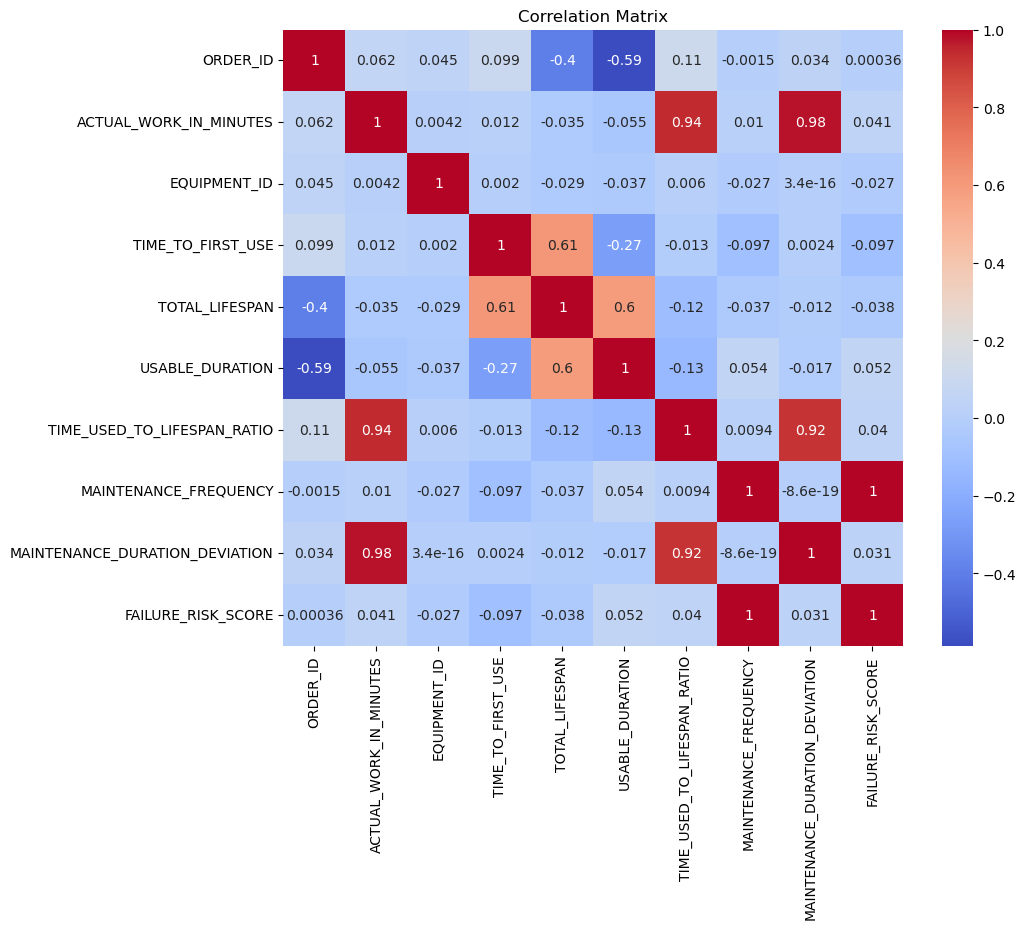

In [226]:
# Select only numeric columns
numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation and plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

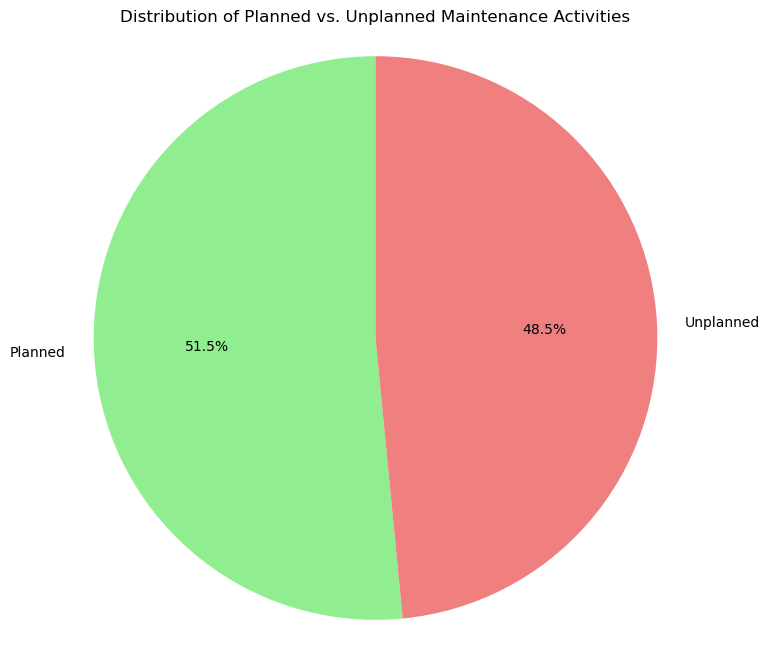

In [227]:
# Counting occurrences of each maintenance activity type
activity_type_counts = cleaned_data['MAINTENANCE_ACTIVITY_TYPE'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(activity_type_counts, labels=activity_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Planned vs. Unplanned Maintenance Activities')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


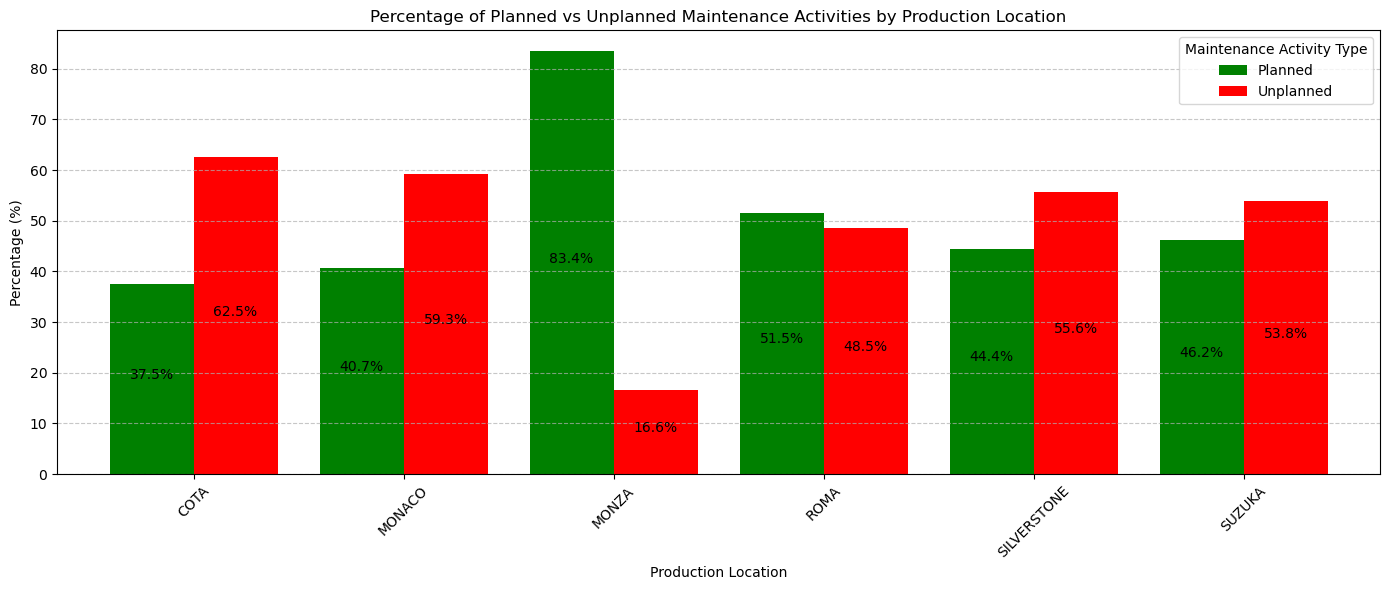

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by Production Location and Maintenance Activity Type, then count the occurrences
grouped_data = cleaned_data.groupby(['PRODUCTION_LOCATION', 'MAINTENANCE_ACTIVITY_TYPE']).size().reset_index(name='Count')

# Calculate the total counts for each production location
total_counts = grouped_data.groupby('PRODUCTION_LOCATION')['Count'].transform('sum')

# Calculate the percentage of each maintenance activity type within each production location
grouped_data['Percentage'] = (grouped_data['Count'] / total_counts) * 100

# Pivot the data to create columns for each maintenance activity type with percentages
pivot_data = grouped_data.pivot(index='PRODUCTION_LOCATION', columns='MAINTENANCE_ACTIVITY_TYPE', values='Percentage').fillna(0)

# Define custom colors for the bars
custom_colors = ['green', 'red']

# Plotting the grouped bar plot with custom colors
ax = pivot_data.plot(kind='bar', figsize=(14, 6), color=custom_colors, width=0.8)
plt.title('Percentage of Planned vs Unplanned Maintenance Activities by Production Location')
plt.xlabel('Production Location')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Maintenance Activity Type', loc='upper right')

# Annotate each bar with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, padding=3)

plt.tight_layout()


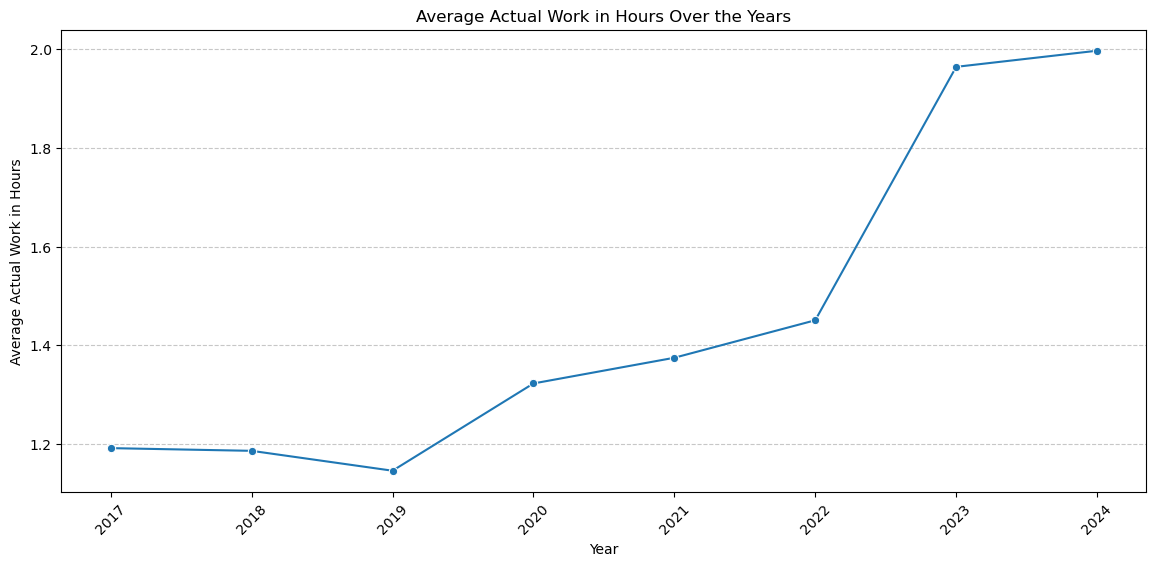

In [228]:
# Ensure date columns are in datetime format
cleaned_data['EXECUTION_FINISH_DATE'] = pd.to_datetime(cleaned_data['EXECUTION_FINISH_DATE'])

# Convert actual work minutes to hours
cleaned_data['ACTUAL_WORK_HOURS'] = cleaned_data['ACTUAL_WORK_IN_MINUTES'] / 60  # Convert minutes to hours

# Extract year from the execution finish date
cleaned_data['YEAR'] = cleaned_data['EXECUTION_FINISH_DATE'].dt.year

# Plotting a Line Plot with trend lines to show the average work time per year
plt.figure(figsize=(14, 6))
sns.lineplot(data=cleaned_data, x='YEAR', y='ACTUAL_WORK_HOURS', ci=None, estimator='mean', marker='o')
plt.title('Average Actual Work in Hours Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Actual Work in Hours')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## 4.Conclusion

Our analysis of the maintenance dataset identified substantial data quality issues, including missing values and inconsistent task descriptions, which were addressed through imputation and standardization. The EDA revealed key opportunities to optimize maintenance operations by addressing significant data quality issues, including missing values and inconsistent task descriptions. Through data cleaning and standardization, we improved the accuracy of maintenance logs, particularly in routine checks and equipment-specific tasks. This enables clearer insights into task frequency and performance, supporting more efficient scheduling and resource allocation. Moving forward, implementing standardized maintenance logging and regular audits will enhance data reliability. With the cleaned data, the company is well-positioned to explore predictive maintenance, reducing equipment downtime and improving operational efficiency.

# Key Insights
1. Distribution of Planned vs. Unplanned Maintenance Activities:
Planned maintenance consists of scheduled preventive tasks to avoid machine failure, usually showing a stable distribution over time, reflecting adherence to schedules. In contrast, unplanned maintenance involves unexpected breakdowns that disrupt production. A higher proportion of unplanned activities suggests inefficiencies in the preventive maintenance strategy, leading to frequent machine breakdowns, operational delays, and increased costs.
2. Patterns of Maintenance Events Across Production Locations:
Location-specific insights reveal that some plants experience more unplanned maintenance, indicating potential issues with machinery or operational procedures, while others with fewer events suggest better maintenance or efficiency. Clustering of maintenance events at certain times or conditions may indicate that factors like peak production periods influence the frequency of breakdowns.
3. Anomalies or Inconsistencies in Data Recording:
Anomalies such as planned maintenance codes linked to unplanned activities suggest misclassification or data entry errors, which can obscure trends and require correction. Inconsistent time records, such as very short planned maintenance or long unplanned events, also indicate potential recording issues that can impact the accuracy of downtime assessments.
4. Frequency and Impact of Various Maintenance Types:
Preventive maintenance occurs less frequently but helps prevent major failures, while corrective maintenance happens more often and leads to longer downtimes, disrupting productivity. Frequent unplanned maintenance has a greater negative impact on production, highlighting the need to prioritize preventive maintenance to reduce disruptions and improve efficiency.
